# **CLICK THROUGH RATE PREDICTION**



```

### Data Preprocessing

In [ ]:
!pip install prince 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier                                                  
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import zero_one_loss
from sklearn.svm import SVC 
import itertools
from sklearn.decomposition import PCA
import random
random.seed(42)

We first imported the dataset in a jupyter notebook. Then we used SMOTE oversampling and Ranndom Undersampling to balance out the classes into 50%-50% distribution. Then we saved the created csv dataframes and imported them into google Colab. 

The train datasets we have imported here synthetized, while the test set in a sample of the original data with 3.45% CTR.


In [ ]:
#train = pd.read_csv('train_set.txt')
#test = pd.read_csv('test3.csv')

In [ ]:
from imblearn.pipeline import Pipeline

#over = SMOTE(sampling_strategy=.1)
#under = RandomUnderSampler(sampling_strategy=1)

#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)

In [ ]:
#Xu, yu = pipeline.fit_resample(X_train, y_train)

In [ ]:
#Xu.to_csv(r'C:\Users\bora_\OneDrive\Documents\AMSE\MAG3 - EBDS\Xu.csv', index = False)
#yu.to_csv(r'C:\Users\bora_\OneDrive\Documents\AMSE\MAG3 - EBDS\yu.csv', index = False)

In [ ]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
link_x = 'https://drive.google.com/file/d/1RyAOaQUhMJy_QZKgPnmGWy44lis9K5eo/view?usp=sharing'
 
# to get the id part of the file 

id = link_x.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('Xu.csv')   
  
Xu = pd.read_csv('Xu.csv') 

link_y = 'https://drive.google.com/file/d/1lIJbhEENabmNai6FdGoJsekbgPF677SA/view?usp=sharing'

# to get the id part of the file 

id = link_y.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('yu.csv')   
  
yu = pd.read_csv('yu.csv') 

link_test = 'https://drive.google.com/file/d/11IAflxzVblkC9bqE79aD0U4AdatO13fp/view?usp=sharing'

# to get the id part of the file 

id = link_test.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('test3.csv')   
  
test = pd.read_csv('test3.csv') 

In [ ]:
def minus_one(st):
    st = st - 1
    st = st
    return st
    
Xu['city_rank1'] = Xu['city_rank'].apply(minus_one)
Xu.city_rank1.unique()

test['city_rank1'] = test['city_rank'].apply(minus_one)
test.city_rank1.unique()

array([1, 2, 3, 4])

In [ ]:
def plus_two(st):
    st = st +2 
    st= st
    return st
    
Xu['his_app_size1'] = Xu['his_app_size'].apply(plus_two)
Xu.his_app_size1.unique()

test['his_app_size1'] = test['his_app_size'].apply(plus_two)
test.his_app_size1.unique()

array([ 6,  1,  8,  7, 18, 11, 16, 20, 10,  4, 15, 19, 13, 21, 17, 23, 22,
        9,  5, 14, 12])

In [ ]:
Xu['device_price1'] = Xu['device_price'].apply(plus_two)
Xu.device_price1.unique()
test['device_price1'] = test['device_price'].apply(plus_two)
test.device_price1.unique() 

Xu['up_membership_grade1'] = Xu['up_membership_grade'].apply(plus_two)
Xu.up_membership_grade1.unique()
test['up_membership_grade1'] = test['up_membership_grade'].apply(plus_two)
test.up_membership_grade1.unique()

Xu['membership_life_duration1'] = Xu['membership_life_duration'].apply(plus_two)
Xu.membership_life_duration1.unique()
test['membership_life_duration1'] = test['membership_life_duration'].apply(plus_two)
test.membership_life_duration1.unique()

Xu['communication_avgonline_30d1'] = Xu['communication_avgonline_30d'].apply(plus_two)
Xu.communication_avgonline_30d1.unique()
test['communication_avgonline_30d1'] = test['communication_avgonline_30d'].apply(plus_two)
test.communication_avgonline_30d1.unique()

Xu['age1'] = Xu['age'].apply(plus_two)
Xu.age1.unique()
test['age1'] = test['age'].apply(plus_two)
test.age1.unique()

array([6, 8, 7, 9, 4, 5, 3, 1])

In [ ]:
y_train = yu[['label']]
X_train = Xu[['adv_id', 'inter_type_cd', 'slot_id', 'tags', 'app_first_class', 'app_second_class', 'age1', 'city_rank1', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size1', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price1', 'up_life_duration', 'up_membership_grade1', 'membership_life_duration1', 'consume_purchase', 'communication_avgonline_30d1', 'indu_name', 'pt_d']]
y_test = test[['label']]
X_test = test[['adv_id', 'inter_type_cd', 'slot_id', 'tags', 'app_first_class', 'app_second_class', 'age1', 'city_rank1', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size1', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price1', 'up_life_duration', 'up_membership_grade1', 'membership_life_duration1', 'consume_purchase', 'communication_avgonline_30d1', 'indu_name', 'pt_d']]

y_train_num = yu[['label']]
X_train_num = Xu[['adv_id', 'inter_type_cd', 'slot_id', 'tags', 'app_first_class', 'app_second_class', 'age1', 'city_rank1', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size1', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price1', 'up_life_duration', 'up_membership_grade1', 'membership_life_duration1', 'consume_purchase', 'communication_avgonline_30d1', 'indu_name', 'pt_d']]
y_test_num = test[['label']]
X_test_num = test[['adv_id', 'inter_type_cd', 'slot_id', 'tags', 'app_first_class', 'app_second_class', 'age1', 'city_rank1', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size1', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price1', 'up_life_duration', 'up_membership_grade1', 'membership_life_duration1', 'consume_purchase', 'communication_avgonline_30d1', 'indu_name', 'pt_d']]

In [ ]:
Scaler = MinMaxScaler()
X_train1 = Scaler.fit_transform(X_train)
X_test1 = Scaler.fit_transform(X_test)

In [ ]:
# no scaling
X_train = pd.DataFrame(X_train, columns = ['adv_id', 'inter_type_cd', 'slot_id', 'tags', 'app_first_class', 'app_second_class', 'age1', 'city_rank1', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size1', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price1', 'up_life_duration', 'up_membership_grade1', 'membership_life_duration1', 'consume_purchase', 'communication_avgonline_30d1', 'indu_name', 'pt_d'])
X_test = pd.DataFrame(X_test, columns = ['adv_id', 'inter_type_cd', 'slot_id', 'tags', 'app_first_class', 'app_second_class', 'age1', 'city_rank1', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size1', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price1', 'up_life_duration', 'up_membership_grade1', 'membership_life_duration1', 'consume_purchase', 'communication_avgonline_30d1', 'indu_name', 'pt_d'])

# scale every variables
X_train1 = pd.DataFrame(X_train1, columns = ['adv_id', 'inter_type_cd', 'slot_id', 'tags', 'app_first_class', 'app_second_class', 'age1', 'city_rank1', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size1', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price1', 'up_life_duration', 'up_membership_grade1', 'membership_life_duration1', 'consume_purchase', 'communication_avgonline_30d1', 'indu_name', 'pt_d'])
X_test1 = pd.DataFrame(X_test1, columns = ['adv_id', 'inter_type_cd', 'slot_id', 'tags', 'app_first_class', 'app_second_class', 'age1', 'city_rank1', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size1', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price1', 'up_life_duration', 'up_membership_grade1', 'membership_life_duration1', 'consume_purchase', 'communication_avgonline_30d1', 'indu_name', 'pt_d'])

# scale only numerical variables
X_train_num = pd.DataFrame(X_train_num, columns = ['adv_id', 'inter_type_cd', 'slot_id', 'tags', 'app_first_class', 'app_second_class', 'age1', 'city_rank1', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size1', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price1', 'up_life_duration', 'up_membership_grade1', 'membership_life_duration1', 'consume_purchase', 'communication_avgonline_30d1', 'indu_name', 'pt_d'])
X_test_num = pd.DataFrame(X_test_num, columns = ['adv_id', 'inter_type_cd', 'slot_id', 'tags', 'app_first_class', 'app_second_class', 'age1', 'city_rank1', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size1', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price1', 'up_life_duration', 'up_membership_grade1', 'membership_life_duration1', 'consume_purchase', 'communication_avgonline_30d1', 'indu_name', 'pt_d'])

In [ ]:
Scaler = MinMaxScaler()
X_train_num[['city_rank1', 'his_app_size1', 'device_size', 'device_price1', 'up_membership_grade1', 'membership_life_duration1','communication_avgonline_30d1','age1' ]] = Scaler.fit_transform(X_train[['city_rank1', 'his_app_size1', 'device_size', 'device_price1', 'up_membership_grade1', 'membership_life_duration1','communication_avgonline_30d1','age1']])
X_test_num[['city_rank1', 'his_app_size1', 'device_size', 'device_price1', 'up_membership_grade1', 'membership_life_duration1','communication_avgonline_30d1','age1' ]] = Scaler.fit_transform(X_test[['city_rank1', 'his_app_size1', 'device_size', 'device_price1', 'up_membership_grade1', 'membership_life_duration1','communication_avgonline_30d1','age1']])

In [ ]:
#indicate each type variable
col_names_cat = [ 'adv_id', 'inter_type_cd', 'slot_id',  'tags', 'app_first_class','app_second_class', 'device_name','career', 'gender', 'net_type',
       'residence',  'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'up_life_duration', 'consume_purchase','indu_name', 'pt_d']

col_name_num = ['age1','city_rank1', 'his_app_size1', 'device_size', 'device_price1', 'up_membership_grade1', 'membership_life_duration1','communication_avgonline_30d1' ]

In [ ]:
for col in X_train1.columns :
    if col in col_names_cat :
        X_train1[col] = X_train1[col].astype(str)
        X_test1[col] = X_test1[col].astype(str)
    else :
        X_train1[col] = pd.to_numeric(X_train1[col])
        X_test1[col] = pd.to_numeric(X_test1[col])

In [ ]:
for col in X_train.columns :
    if col in col_names_cat :
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)
    else :
        X_train[col] = pd.to_numeric(X_train[col])
        X_test[col] = pd.to_numeric(X_test[col])

In [ ]:
for col in X_train_num.columns :
    if col in col_names_cat :
        X_train_num[col] = X_train_num[col].astype(str)
        X_test_num[col] = X_test_num[col].astype(str)
    else :
        X_train_num[col] = pd.to_numeric(X_train_num[col])
        X_test_num[col] = pd.to_numeric(X_test_num[col])

In [ ]:
#We first create a subset as our computers cannot handle such amount of data for computations
X_train_num2 = X_train_num.sample(n = 50000)
i = X_train_num2.index
y_train_num2 = y_train.iloc[i]

X_test_num2 = X_test_num.sample(n = 15000)
i = X_test_num2.index
y_test_num2 = y_test.iloc[i]

In [ ]:
X_train_st = X_train1.sample(n = 50000)
i = X_train_st.index
y_train_st = y_train.iloc[i]

X_test_st = X_test1.sample(n = 15000)
i = X_test_st.index
y_test_st = y_test.iloc[i]

In [ ]:
X_train3 = X_train.sample(n = 50000)
i = X_train3.index
y_train3 = y_train.iloc[i]

X_test3 = X_test.sample(n = 15000)
i = X_test3.index
y_test3 = y_test.iloc[i]

###Descriptive Statistics

In [ ]:
X_test7= X_test[['age1','city_rank1', 'his_app_size1', 'device_size', 'device_price1', 'up_membership_grade1', 'membership_life_duration1','communication_avgonline_30d1' ]]

In [ ]:
X_test7.describe()

,age1,city_rank1,his_app_size1,device_size,device_price1,up_membership_grade1,membership_life_duration1,communication_avgonline_30d1
count,356211.000000,356211.000000,356211.000000,356211.000000,356211.000000,356211.000000,356211.000000,356211.000000
mean,7.058572,2.868516,8.555426,158.135215,5.475757,1.243701,1.027672,13.141736
std,1.417770,0.908284,5.899354,44.938221,1.158364,0.657299,0.720816,1.651697
min,1.000000,1.000000,1.000000,102.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,2.000000,6.000000,141.000000,5.000000,1.000000,1.000000,12.000000
50%,7.000000,3.000000,7.000000,141.000000,6.000000,1.000000,1.000000,13.000000
75%,8.000000,4.000000,13.000000,162.000000,6.000000,1.000000,1.000000,14.000000
max,9.000000,4.000000,23.000000,349.000000,9.000000,5.000000,22.000000,15.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

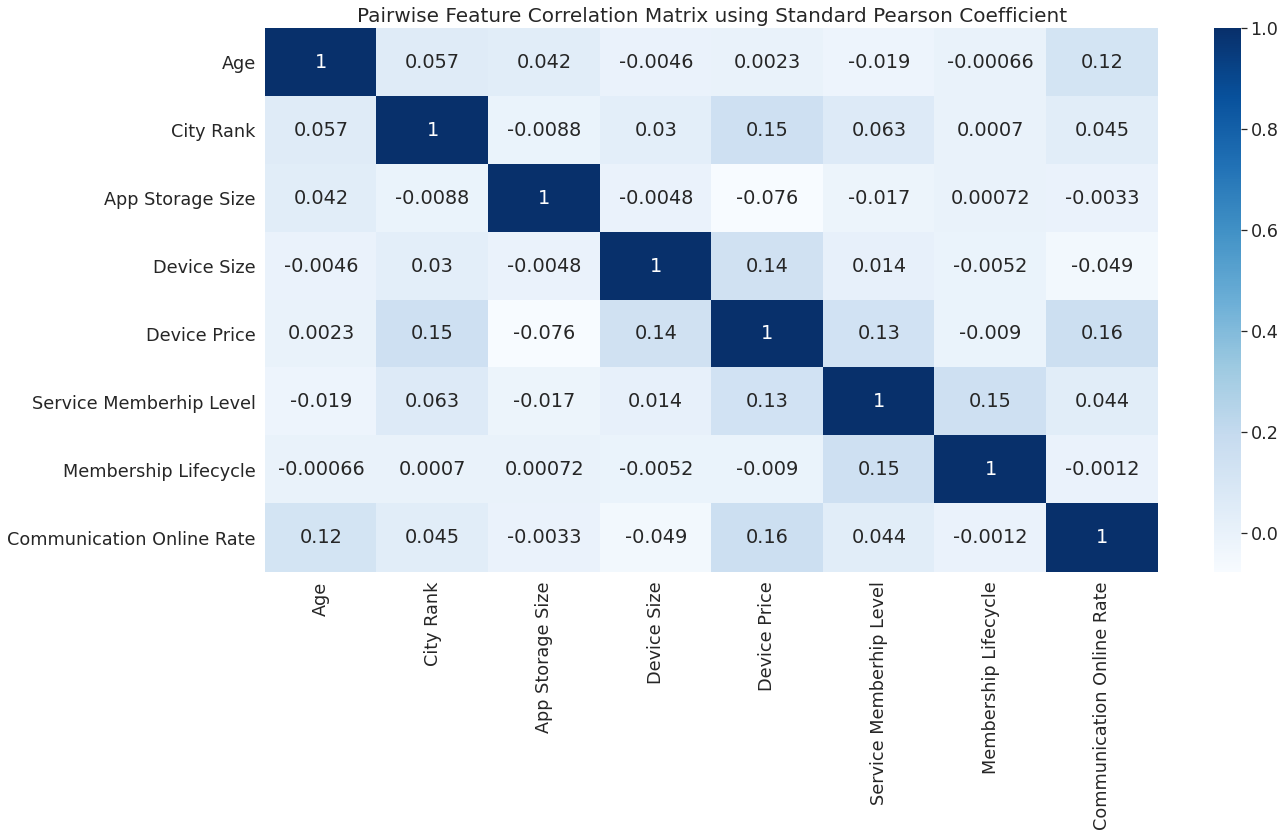

In [ ]:
from google.colab import files
col_names = ['Age','City Rank', 'App Storage Size', 'Device Size', 'Device Price', 'Service Memberhip Level', 'Membership Lifecycle','Communication Online Rate' ]
corr=X_test7.corr()
a8 = plt.figure(figsize = (20,10))
sns.set(font_scale=1.6)
sns.heatmap(corr,
        xticklabels=col_names,
        yticklabels=col_names, annot=True, cmap = 'Blues')
plt.title('Pairwise Feature Correlation Matrix using Standard Pearson Coefficient', size = (20))
plt.savefig('Corr Matrix.png', bbox_inches = 'tight')
files.download("Corr Matrix.png")


# **Supervised Learning**

## **PRINCIPAL COMPONENT METHODS**

## **FACTORIAL ANALYSIS of MIXED DATA**

In [ ]:
## Instantiate FAMD object
famd = prince.FAMD(
     n_components=5,
#n_iter parameter which controls the number of iterations used for computing the SVD
     copy=True,
     check_input=True,
     engine='sklearn')

In [ ]:
#The package will automatically standardize the numerical values so we use the original database
X_famd = X_train3.sample(n=30000)

In [ ]:
## Fit FAMD object to data 
famd = famd.fit(X_famd)

## Inspect principal dimensions
pp = pprint.PrettyPrinter()
pp.pprint(famd.explained_inertia_)

array([0.00279997, 0.00229127, 0.00183176, 0.00168747, 0.00150978])


In [ ]:
sum(famd.explained_inertia_) #Really poor

0.010120243281151119

In [ ]:
## We saw that some people use one hot encoding to perform PCA so we will try it to see how it works.

In [ ]:
# using sklearn

In [ ]:
X_train4_st = pd.get_dummies(data = X_train_num2, drop_first=True)

In [ ]:
pca = PCA(n_components=15)
pca.fit(X_train4_st)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_)

[0.0769057  0.04688064 0.03770168 0.03366596 0.02853054 0.02437093
 0.02171373 0.01975433 0.01911388 0.01700797 0.01638275 0.01477943
 0.01399259 0.01327262 0.013057  ]


In [ ]:
sum(pca.explained_variance_ratio_)

0.39712976652055393

In [ ]:
cor_mat = np.corrcoef(X_train4_st.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

## **LOGISTIC REGRESSION**

In [ ]:
log1 = LogisticRegression(penalty = 'none', solver='saga')
log1.fit(X_train_num2, y_train_num2.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predlog = log1.predict(X_test_num2)
round(log1.score(X_test_num2,y_test_num2),2)

0.54

In [ ]:
print(log1.coef_, log1.intercept_)

[[ 7.19488744e-05 -1.81583049e-03 -3.01875588e-02  2.41691536e-02
   4.18348777e-03 -9.99638932e-03 -7.52039839e-04 -4.39208369e-03
   2.29992158e-03  5.25437390e-04  1.10959966e-02 -3.94181688e-03
  -2.66109534e-03  2.88486302e-03  1.06711868e-04  7.69324313e-03
   4.89409606e-04 -1.18428615e-02 -1.39886792e-03 -2.66073337e-03
  -1.53389065e-02 -3.77414481e-04  1.64964994e-05 -3.73719061e-03
  -1.15045029e-03 -1.16045415e-02 -1.37866761e-02]] [0.00051607]


In [ ]:
metrics.roc_auc_score(y_test_num2, y_predlog)

0.5695379120526858

Confusion matrix, without normalization
[[7603 6856]
 [ 207  334]]
Normalized confusion matrix
[[0.52583166 0.47416834]
 [0.38262477 0.61737523]]


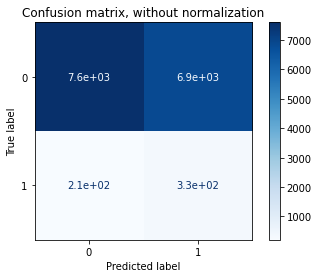

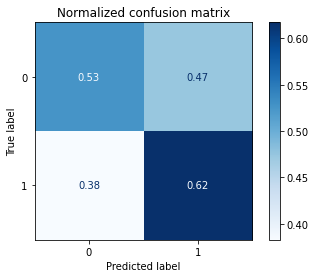

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(log1, X_test_num2, y_test_num2, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

## **RIDGE**

In [ ]:
regul_strength = [0.0001, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [ ]:
coefficient_Ridge = []
score_Ridge = []
performances = []

for i in range(len(regul_strength)):
    clf_Ridge = LogisticRegression(penalty = 'l2', solver='saga', C = regul_strength[i])
    clf_Ridge.fit(X_train_st, y_train_st.values.ravel())
    coefficient_Ridge.append(clf_Ridge.coef_)
    y_predRidge= clf_Ridge.predict(X_test_st)
    score_Ridge.append(clf_Ridge.score(X_test_st, y_test_st))
    cm = confusion_matrix(y_test_st, y_predRidge)
    performances.append([cm[1][0],cm[1][1]])

In [ ]:
coefficient_Ridge2 = np.reshape(coefficient_Ridge, (18, 27))

In [ ]:
df = pd.DataFrame(coefficient_Ridge2, columns = X_train_st.columns)

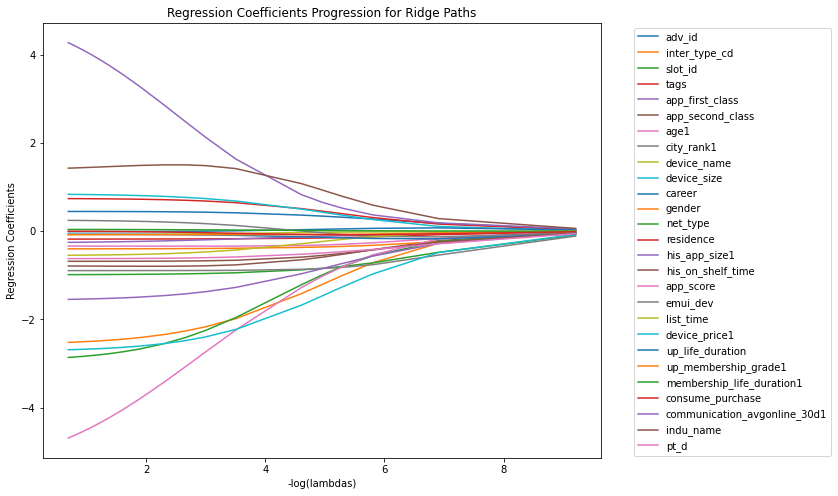

In [ ]:
#plot 
from matplotlib.font_manager import FontProperties
from matplotlib.pyplot import figure

fontP = FontProperties()

figure(figsize=(10, 8))
log_lambdas = -np.log(regul_strength)
ax = plt.gca()
#plt.xlim(0,4)
plt.plot(log_lambdas, df)

plt.ylabel('Regression Coefficients')
plt.legend(df.columns, bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

plt.xlabel('-log(lambdas)')
plt.title('Regression Coefficients Progression for Ridge Paths')
plt.show()

tuning parameter

In [ ]:
regul_strength = [0.0001, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [ ]:
score_Ridge = []
AUC_score_Ridge = []
performances_Ridge = []

for i in range(len(regul_strength)):
  clf_Ridge = LogisticRegression(penalty = 'l2', solver='saga', C = regul_strength[i], random_state = 42)
  clf_Ridge.fit(X_train_st, y_train_st.values.ravel())
  y_predRidge= clf_Ridge.predict(X_test_st)
  score_Ridge.append(clf_Ridge.score(X_test_st, y_test_st))
  AUC_score_Ridge.append(metrics.roc_auc_score(y_test_st, y_predRidge))
  cm = confusion_matrix(y_test_st, y_predRidge)
  performances_Ridge.append([cm[1][0],cm[1][1]])

In [ ]:
# What is the parameter that maximizes the AUC?
print(AUC_score_Ridge.index(max(AUC_score_Ridge)))

0


In [ ]:
clf_Ridge = LogisticRegression(penalty = 'l2', solver='saga', C = 0.001, random_state=42)
clf_Ridge.fit(X_train_st, y_train_st.values.ravel())
y_predRidge= clf_Ridge.predict(X_test_st)
clf_Ridge.score(X_test_st, y_test_st)
print(metrics.roc_auc_score(y_test_st, y_predRidge))
confusion_matrix(y_test_st, y_predRidge)

0.5730774294650713


array([[8994, 5490],
       [ 245,  271]])

Confusion matrix, without normalization
[[8994 5490]
 [ 245  271]]
Normalized confusion matrix
[[0.62096106 0.37903894]
 [0.4748062  0.5251938 ]]


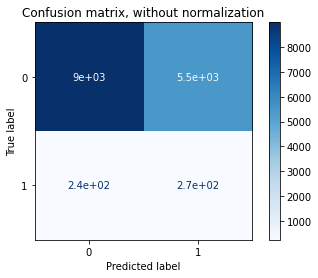

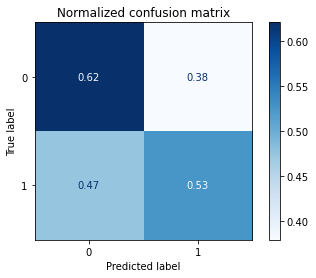

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(clf_Ridge, X_test_st, y_test_st, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

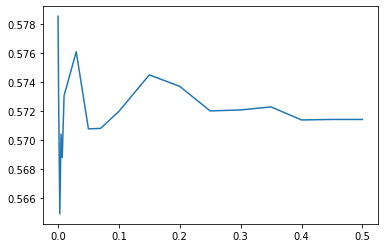

In [ ]:
plt.plot(regul_strength, AUC_score_Ridge)

## **LASSO**

In [ ]:
regul_strength = [0.0001, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [ ]:
coefficient_lasso = []
score_lasso = []
performances = []

for i in range(len(regul_strength)):
    clf_lasso = LogisticRegression(penalty = 'l1', solver='saga', C = regul_strength[i])
    clf_lasso.fit(X_train_st, y_train_st.values.ravel())
    coefficient_lasso.append(clf_lasso.coef_)
    y_predlasso= clf_lasso.predict(X_test_st)
    score_lasso.append(clf_lasso.score(X_test_st, y_test_st))
    cm = confusion_matrix(y_test_st, y_predlasso)
    performances.append([cm[1][0],cm[1][1]])

In [ ]:
coefficient_lasso2 = np.reshape(coefficient_lasso, (18, 27))

In [ ]:
df = pd.DataFrame(coefficient_lasso2, columns = X_train_st.columns)

#device_size, city_rank, his app size, emui_version, gender, career, app_membershipgrapde,'up_life_duration1' ,'slot_id'

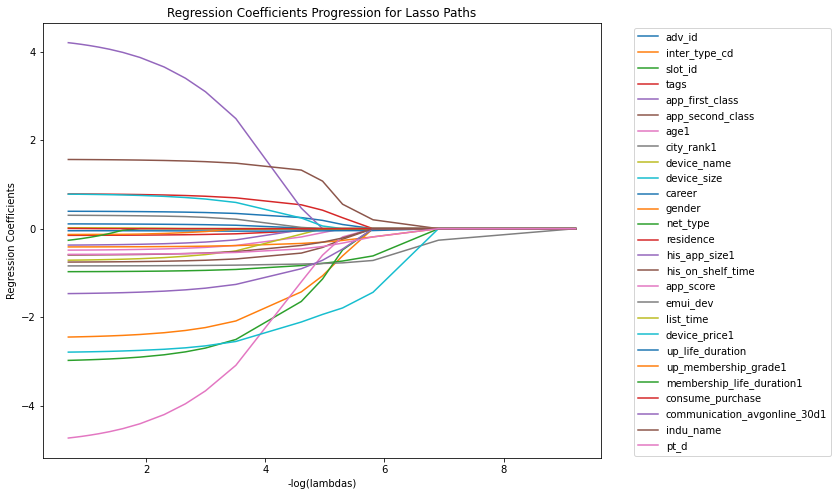

In [ ]:
#plot 
from matplotlib.font_manager import FontProperties
from matplotlib.pyplot import figure

fontP = FontProperties()

figure(figsize=(10, 8))
log_lambdas = -np.log(regul_strength)
ax = plt.gca()
#plt.xlim(0,4)
plt.plot(log_lambdas, df)

plt.ylabel('Regression Coefficients')
plt.legend(df.columns, bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

plt.xlabel('-log(lambdas)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

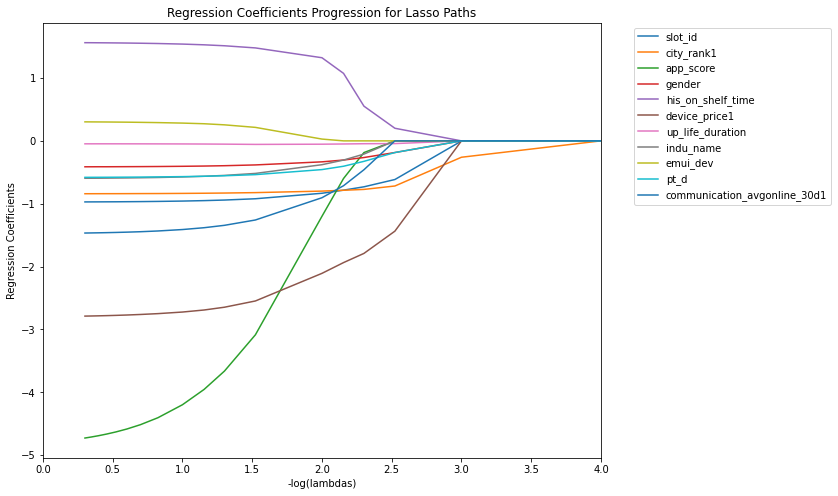

In [ ]:
#plot 
fontP = FontProperties()

figure(figsize=(10, 8))
log_lambdas= -np.log10(regul_strength)
ax = plt.gca()
plt.xlim(0,4)
plt.plot(log_lambdas, df[['slot_id','city_rank1','app_score','gender','his_on_shelf_time','device_price1','up_life_duration', 'indu_name',	
                          'emui_dev','pt_d','communication_avgonline_30d1']])

leg = ['slot_id','city_rank1','app_score','gender','his_on_shelf_time','device_price1','up_life_duration', 'indu_name','emui_dev',
       'pt_d','communication_avgonline_30d1']
plt.ylabel('Regression Coefficients')
plt.legend(leg, bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

plt.xlabel('-log(lambdas)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

In [ ]:
#Testing the best lambda

In [ ]:
regul_strength = [0.0001, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,0.55, 0.6, 0.65, 0.7, 0.75]

In [ ]:
score_lasso = []
AUC_score_lasso = []
performances_lasso = []

for i in range(len(regul_strength)):
  clf_lasso = LogisticRegression(penalty = 'l1', solver='saga', C = regul_strength[i], random_state = 42)
  clf_lasso.fit(X_train_st, y_train_st.values.ravel())
  y_predlasso= clf_lasso.predict(X_test_st)
  score_lasso.append(clf_lasso.score(X_test_st, y_test_st))
  AUC_score_lasso.append(metrics.roc_auc_score(y_test_st, y_predlasso))
  cm = confusion_matrix(y_test_st, y_predlasso)
  performances_lasso.append([cm[1][0],cm[1][1]])

In [ ]:
# What is the parameter that maximizes the AUC?
print(AUC_score_lasso.index(max(AUC_score_lasso)))

6


In [ ]:
clf_lasso = LogisticRegression(penalty = 'l1', solver='saga', C = 0.005, random_state=42)
clf_lasso.fit(X_train_st, y_train_st.values.ravel())
y_predlasso= clf_lasso.predict(X_test_st)
clf_lasso.score(X_test_st, y_test_st)
print(metrics.roc_auc_score(y_test_st, y_predlasso))
confusion_matrix(y_test_st, y_predlasso)

0.5675131500356447


array([[9310, 5174],
       [ 262,  254]])

Confusion matrix, without normalization
[[9310 5174]
 [ 262  254]]
Normalized confusion matrix
[[0.64277824 0.35722176]
 [0.50775194 0.49224806]]


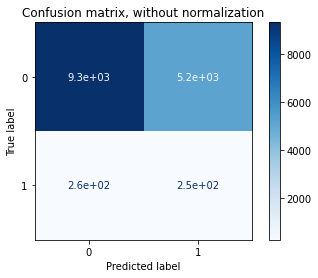

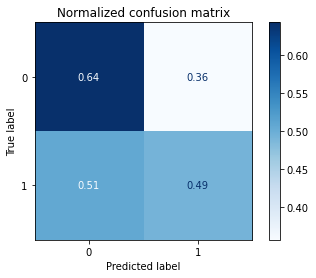

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(clf_lasso, X_test_st, y_test_st, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

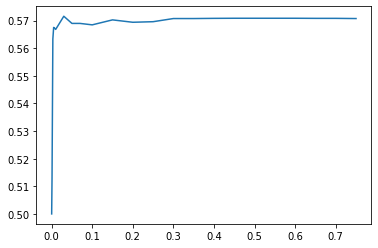

In [ ]:
plt.plot(regul_strength, AUC_score_lasso)

New try for logistic regression using selected features

In [ ]:
X_train2 = X_train_st[['slot_id','city_rank1','gender','his_on_shelf_time','device_price1','device_size',
                       'up_life_duration', 'indu_name','pt_d','emui_dev','gender','pt_d','communication_avgonline_30d1']]
X_test2 = X_test_st[['slot_id','city_rank1','gender','his_on_shelf_time','device_price1','device_size',
                     'up_life_duration', 'indu_name','pt_d','emui_dev','gender','pt_d','communication_avgonline_30d1']]

In [ ]:
log2 = LogisticRegression(penalty = 'none',solver='saga')

In [ ]:
log2.fit(X_train2,y_train_num2.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log2.predict(X_test2)
log2.score(X_test2,y_test_num2)

0.5299333333333334

Confusion matrix, without normalization
[[7722 6755]
 [ 296  227]]
Normalized confusion matrix
[[0.5333978  0.4666022 ]
 [0.56596558 0.43403442]]


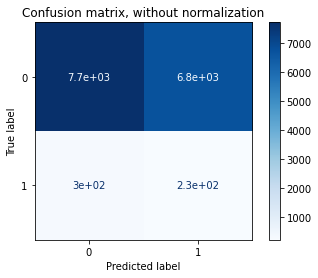

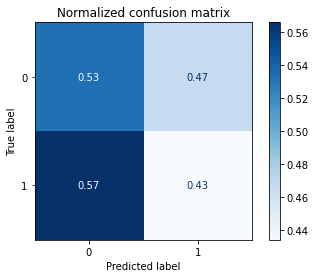

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(log2, X_test2, y_test_num2, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

## **ELASTIC NET**

In [ ]:
regul_strength = [0.0001, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
ratio_lasso_ridge = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [ ]:
coefficient_EN = []
score_EN = []
performances = []

for j in range(len(ratio_lasso_ridge)):
  for i in range(len(regul_strength)):
    clf_EN = LogisticRegression(penalty = 'elasticnet', solver='saga', C = regul_strength[i], l1_ratio = ratio_lasso_ridge[j])
    clf_EN.fit(X_train_st, y_train_st.values.ravel())
    coefficient_EN.append(clf_EN.coef_)
    y_predEN= clf_EN.predict(X_test_st)
    score_EN.append(clf_EN.score(X_test_st, y_test_st))
    cm = confusion_matrix(y_test_st, y_predEN)
    performances.append([cm[1][0],cm[1][1]])

In [ ]:
coefficient_EN2 = np.reshape(coefficient_EN, (198, 27))

In [ ]:
df = pd.DataFrame(coefficient_EN2, columns = X_train_st.columns)

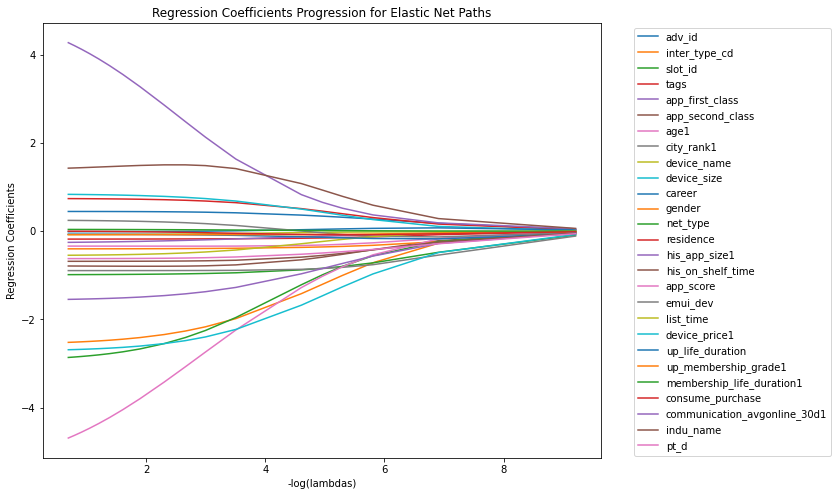

In [ ]:
#plot 
from matplotlib.font_manager import FontProperties
from matplotlib.pyplot import figure

fontP = FontProperties()

figure(figsize=(10, 8))
log_lambdas = -np.log(regul_strength)
ax = plt.gca()
#plt.xlim(0,4)
plt.plot(log_lambdas, df.iloc[:18,:])

plt.ylabel('Regression Coefficients')
plt.legend(df.columns, bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

plt.xlabel('-log(lambdas)')
plt.title('Regression Coefficients Progression for Elastic Net Paths')
plt.show()

In [ ]:
# Testing the best lambda

In [ ]:
regul_strength = [0.0001, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
ratio_lasso_ridge = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [ ]:
para_to_test_EN = [ratio_lasso_ridge,regul_strength]
para_to_test_EN = list(itertools.product(*para_to_test_EN))
print( "all possible combinaisons of parameters : ", len(para_to_test_EN))

all possible combinaisons of parameters :  198


In [ ]:
score_EN = []
AUC_score_EN = []
performances = []

for j in range(len(ratio_lasso_ridge)):
  for i in range(len(regul_strength)):
    clf_EN = LogisticRegression(penalty = 'elasticnet', solver='saga', C = regul_strength[i], l1_ratio = ratio_lasso_ridge[j])
    clf_EN.fit(X_train_st, y_train_st.values.ravel())
    y_predEN= clf_EN.predict(X_test_st)
    score_EN.append(clf_EN.score(X_test_st, y_test_st))
    AUC_score_EN.append(metrics.roc_auc_score(y_test_st, y_predEN))
    cm = confusion_matrix(y_test_st, y_predEN)
    performances.append([cm[1][0],cm[1][1]])

In [ ]:
# What are the parameters that maximizes the AUC?
print(para_to_test_EN[AUC_score_EN.index(max(AUC_score_EN))])

(0.8, 0.003)


In [ ]:
clf_EN = LogisticRegression(penalty = 'elasticnet', solver='saga', C = 0.003, l1_ratio = 0.8)
clf_EN.fit(X_train_st, y_train_st.values.ravel())
y_predEN= clf_EN.predict(X_test_st)
clf_EN.score(X_test_st, y_test_st)
print(metrics.roc_auc_score(y_test_st, y_predEN))
confusion_matrix(y_test_st, y_predEN)

0.5665409465456671


array([[8945, 5539],
       [ 250,  266]])

Confusion matrix, without normalization
[[8945 5539]
 [ 250  266]]
Normalized confusion matrix
[[0.61757802 0.38242198]
 [0.48449612 0.51550388]]


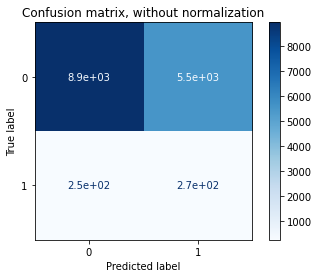

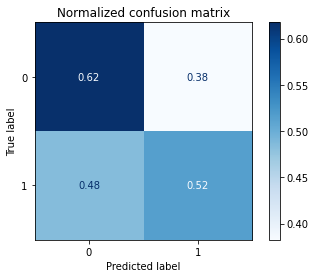

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(clf_EN, X_test_st, y_test_st, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

## **LINEAR DISCRIMINANT ANALYSIS**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
modelLDA = LinearDiscriminantAnalysis(n_components = 1,solver = 'svd')
modelLDA.fit(X_train4_st, y_train_num2.values.ravel())
y_pred = modelLDA.predict(X_test_num2)
Accuracy.append(metrics.accuracy_score(y_pred, y_test_num2))

In [ ]:
#Test for hyperparameters
l = ['svd', 'eigen']
#Accuracy = []
var = []

for i in range(len(l)):
  modelLDA = LinearDiscriminantAnalysis(n_components = 1,solver = l[i])
  modelLDA.fit(X_train4_st, y_train_num2.values.ravel())
  #y_pred = modelLDA.predict(X_test_num2)
  #Accuracy.append(metrics.accuracy_score(y_pred, y_test_num2))
  var.append(modelLDA.explained_variance_ratio_)

In [ ]:
var

[0.6814, 0.6814, 0.6814]

In [ ]:
#Test for hyperparameters
l = np.arange(0,1,0.1)
Accuracy = []

for i in range(len(l)):
  modelLDA = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = l[i])
  modelLDA.fit(X_train_num2, y_train_num2.values.ravel())
  y_pred = modelLDA.predict(X_test_num2)
  Accuracy.append(metrics.accuracy_score(y_pred, y_test_num2))

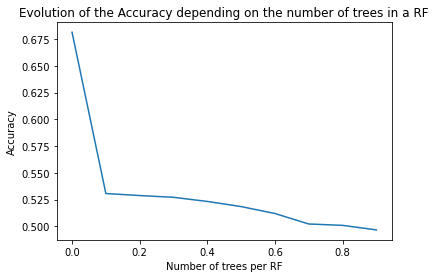

In [ ]:
# plotting the points accuracy
plt.plot(l, Accuracy) 
plt.xlabel('Number of trees per RF') 
plt.ylabel('Accuracy') 
plt.title('Evolution of the Accuracy depending on the number of trees in a RF') 
plt.show() 

Finale Linear Discriminant Analysis 

In [ ]:
#we keep the default settings
modelLDA = LinearDiscriminantAnalysis(solver = 'svd')
modelLDA.fit(X_train_num2, y_train_num2.values.ravel())
y_pred = modelLDA.predict(X_test_num2)
print('The Accuracy is : ', round(metrics.accuracy_score(y_pred, y_test_num2),2))

The Accuracy is :  0.68


Confusion matrix, without normalization
[[9951 4526]
 [ 253  270]]
Normalized confusion matrix
[[0.68736617 0.31263383]
 [0.48374761 0.51625239]]


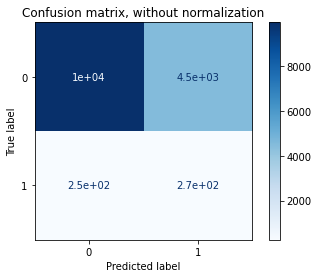

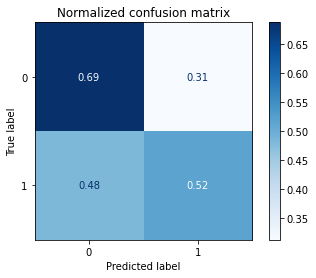

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(modelLDA, X_test_num2, y_test_num2, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

## **DECISION TREE CLASSIFIER**

In [ ]:
# Before doing a random, we would like to look at what results can be obtain with a simple decision tree

In [ ]:
modelDT=DecisionTreeClassifier()
modelDT.fit(X_train3,y_train3.values.ravel())
y_predDT=modelDT.predict(X_test3)
metrics.accuracy_score(y_test3, y_predDT)
metrics.roc_auc_score(y_test3, y_predDT)

0.5772896302592435

Confusion matrix, without normalization
[[10258  4222]
 [  288   232]]
Normalized confusion matrix
[[0.70842541 0.29157459]
 [0.55384615 0.44615385]]


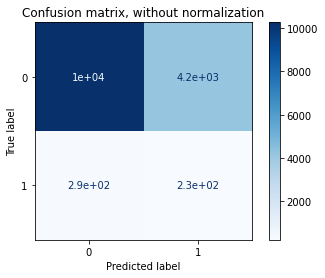

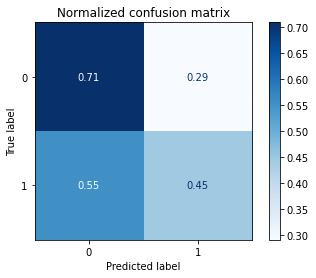

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(modelDT, X_test3, y_test3, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

## **RANDOM FOREST**

In [ ]:
l = [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500]

Accuracy = []
AUC_score = []

for i in range(len(l)):
    modelRF=RandomForestClassifier(n_estimators=l[i])
    modelRF.fit(X_train3,y_train3.values.ravel())
    y_pred=modelRF.predict(X_test3)
    Accuracy.append(metrics.accuracy_score(y_test3, y_pred))
    AUC_score.append(metrics.roc_auc_score(y_test3, y_pred))

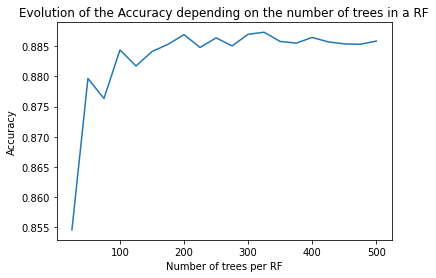

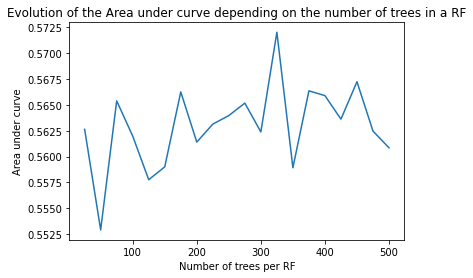

In [ ]:
# plotting the points accuracy
plt.plot(l, Accuracy) 
plt.xlabel('Number of trees per RF') 
plt.ylabel('Accuracy') 
plt.title('Evolution of the Accuracy depending on the number of trees in a RF') 
plt.show() 

# plotting the points AUC_score 
plt.plot(l, AUC_score) 
plt.xlabel('Number of trees per RF') 
plt.ylabel('Area under curve') 
plt.title('Evolution of the Area under curve depending on the number of trees in a RF') 
plt.show() 

Playing with : min_samples_leaf

In [ ]:
# How does the MSE moves when we change the number of minimum number of samples required to be at a leaf node.
nb_leaf = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Accuracy_min_leaf = []
AUC_score_min_leaf = []

for i in range(len(nb_leaf)):
    modelRF=RandomForestClassifier(n_estimators=500, min_samples_leaf = nb_leaf[i])
    modelRF.fit(X_train3,y_train3.values.ravel())
    y_pred=modelRF.predict(X_test3)
    Accuracy_min_leaf.append(metrics.accuracy_score(y_test3, y_pred))
    AUC_score_min_leaf.append(metrics.roc_auc_score(y_test3, y_pred))

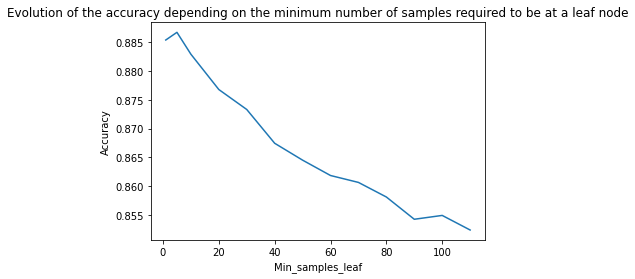

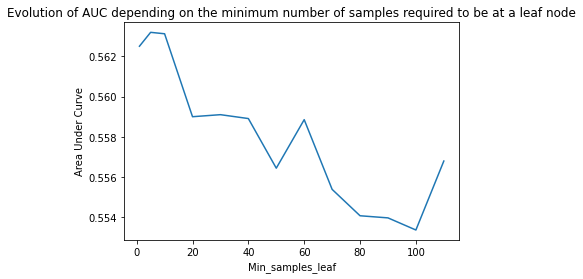

In [ ]:
# plotting the points Accuracy
plt.plot(nb_leaf, Accuracy_min_leaf) 
plt.xlabel('Min_samples_leaf') 
plt.ylabel('Accuracy') 
plt.title('Evolution of the accuracy depending on the minimum number of samples required to be at a leaf node') 
plt.show() 

# plotting the points AUC
plt.plot(nb_leaf, AUC_score_min_leaf) 
plt.xlabel('Min_samples_leaf') 
plt.ylabel('Area Under Curve') 
plt.title('Evolution of AUC depending on the minimum number of samples required to be at a leaf node') 
plt.show() 

Playing with : max_depth

In [ ]:
# How does the MSE moves when we change the max_depth hyperparameter (The maximum depth of the tree).
nb_max_depth = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Accuracy_max_depth = []
AUC_score_max_depth = []

for i in range(len(nb_max_depth)):
    modelRF=RandomForestClassifier(n_estimators=500, max_depth = nb_max_depth[i])
    modelRF.fit(X_train3,y_train3.values.ravel())
    y_pred=modelRF.predict(X_test3)
    Accuracy_max_depth.append(metrics.accuracy_score(y_test3, y_pred))
    AUC_score_max_depth.append(metrics.roc_auc_score(y_test3, y_pred))

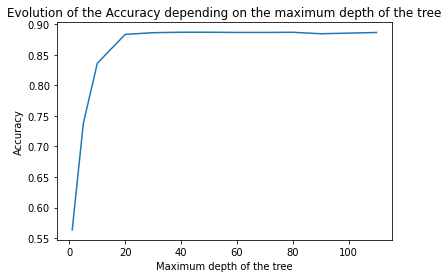

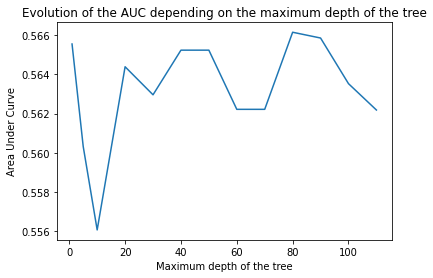

In [ ]:
# plotting the points ACCURACY
plt.plot(nb_max_depth, Accuracy_max_depth) 
plt.xlabel('Maximum depth of the tree') 
plt.ylabel('Accuracy') 
plt.title('Evolution of the Accuracy depending on the maximum depth of the tree') 
plt.show() 

# plotting the points AUC
plt.plot(nb_max_depth, AUC_score_max_depth) 
plt.xlabel('Maximum depth of the tree') 
plt.ylabel('Area Under Curve') 
plt.title('Evolution of the AUC depending on the maximum depth of the tree') 
plt.show() 

Playing with min_samples_split

In [ ]:
# How does the MSE moves when we change the minimum number of samples required to split an internal node.
nb_min_split = [2, 5, 10, 20, 30, 50, 70, 90, 110]
RSquared_min_split = []
MSE_min_split = []
Accuracy_min_split = []
AUC_score_min_split = []

for i in range(len(nb_min_split)):
    modelRF=RandomForestClassifier(n_estimators=500, max_depth = 40, min_samples_split = nb_min_split[i])
    modelRF.fit(X_train3,y_train3.values.ravel())
    y_pred=modelRF.predict(X_test3)
    RSquared_min_split.append(metrics.r2_score(y_test3, y_pred))
    MSE_min_split.append(metrics.mean_squared_error(y_test3, y_pred))
    Accuracy_min_split.append(metrics.accuracy_score(y_test3, y_pred))
    AUC_score_min_split.append(metrics.roc_auc_score(y_test3, y_pred))

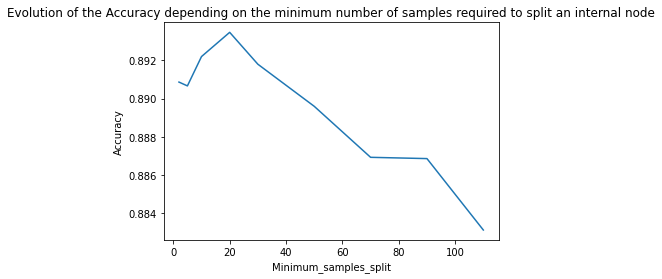

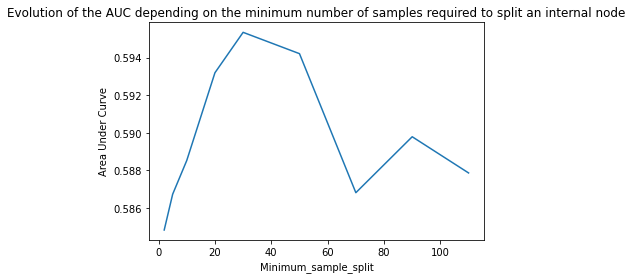

In [ ]:
# plotting the points Accuracy
plt.plot(nb_min_split, Accuracy_min_split) 
plt.xlabel('Minimum_samples_split') 
plt.ylabel('Accuracy') 
plt.title('Evolution of the Accuracy depending on the minimum number of samples required to split an internal node') 
plt.show() 

# plotting the points AUC
plt.plot(nb_min_split, AUC_score_min_split) 
plt.xlabel('Minimum_sample_split') 
plt.ylabel('Area Under Curve') 
plt.title('Evolution of the AUC depending on the minimum number of samples required to split an internal node') 
plt.show() 

Playing with : max_features (The number of features to consider when looking for the best split)

In [ ]:
l_max_features = ['auto', 'sqrt', 'log2']
RSquared_max_features = []
MSE_max_features = []
Accuracy_max_features = []
AUC_score_max_features = []

for i in range(len(l_max_features)):
    modelRF=RandomForestClassifier(n_estimators=500, max_depth = 40, min_samples_split = 30, max_features = l_max_features[i])
    modelRF.fit(X_train3,y_train3.values.ravel())
    y_pred=modelRF.predict(X_test3)
    RSquared_max_features.append(metrics.r2_score(y_test3, y_pred))
    MSE_max_features.append(metrics.mean_squared_error(y_test3, y_pred))
    Accuracy_max_features.append(metrics.accuracy_score(y_test3, y_pred))
    AUC_score_max_features.append(metrics.roc_auc_score(y_test3, y_pred))

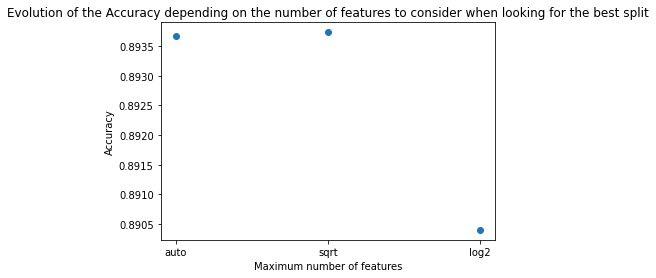

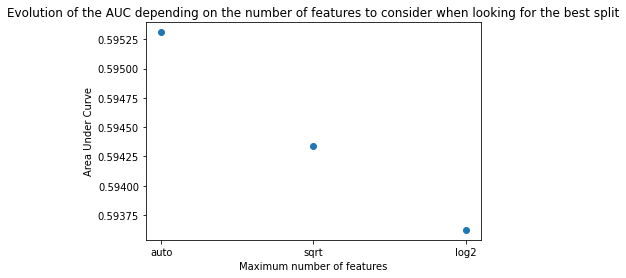

In [ ]:
# plotting the points  Accuracy
plt.scatter(l_max_features, Accuracy_max_features)
plt.xlabel('Maximum number of features') 
plt.ylabel('Accuracy') 
plt.title('Evolution of the Accuracy depending on the number of features to consider when looking for the best split') 
plt.show() 

# plotting the points  AUC
plt.scatter(l_max_features, AUC_score_max_features) 
plt.xlabel('Maximum number of features') 
plt.ylabel('Area Under Curve') 
plt.title('Evolution of the AUC depending on the number of features to consider when looking for the best split') 
plt.show() 

The final Random Forest 


In [ ]:
modelRF=RandomForestClassifier(n_estimators=500, max_depth = 20, min_samples_split = 30, max_features = 'auto')
modelRF.fit(X_train3,y_train3.values.ravel())
y_pred=modelRF.predict(X_test3)

In [ ]:
print('The accuracy of the Random forest is :', round(metrics.accuracy_score(y_test3, y_pred), 2))
print('The area under curve is :' , round(metrics.roc_auc_score(y_test3, y_pred), 2))

The accuracy of the Random forest is : 0.89
The area under curve is : 0.59


No handles with labels found to put in legend.


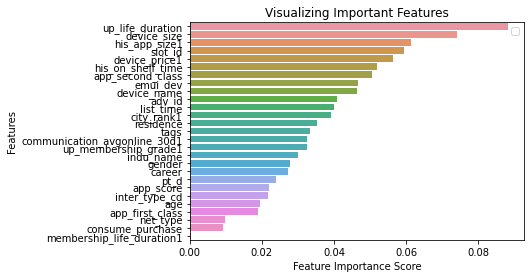

In [ ]:
#visualize important features :

feature_imp = pd.Series(modelRF.feature_importances_,index=X_train3.columns).sort_values(ascending=False)
feature_imp

%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

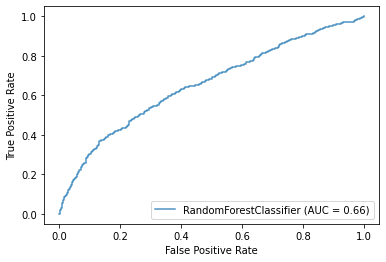

In [ ]:
rfc = metrics.plot_roc_curve(modelRF, X_test3, y_test3, alpha=0.8)
plt.show()

Confusion matrix, without normalization
[[6583 7894]
 [ 154  369]]
Normalized confusion matrix
[[0.45472128 0.54527872]
 [0.29445507 0.70554493]]


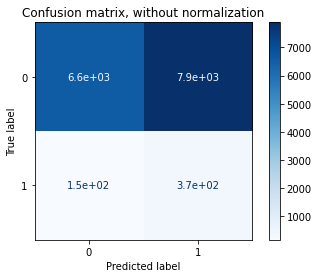

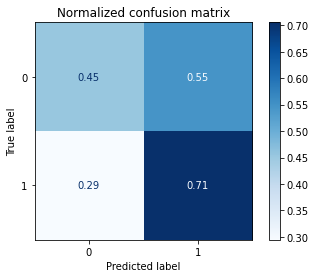

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(modelRF, X_test_num2, y_test_num2, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

## **SUPPORT VECTOR CLASSIFIER**

In [ ]:
# Simple test for SVC

modelSVC = SVC() 
modelSVC.fit(X_train_st, y_train_st.values.ravel()) 

y_predSVC = modelSVC.predict(X_test_st) 
print(confusion_matrix(y_test_st, y_predSVC))
#print(matthews_corrcoef(y_test_st, y_predSVC))
print(metrics.roc_auc_score(y_test_st, y_predSVC))

[[12524  1968]
 [  363   145]]
0.5748170046574704


In [ ]:
# 3 parameter values to test
regularization = [0.0001, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05]
para_gamma = [1, 0.1, 0.01, 0.001]
kernel = ['sigmoid','poly', 'rbf']

para_to_test_SVC = [regularization, para_gamma, kernel ]
para_to_test_SVC = list(itertools.product(*para_to_test_SVC))
print( "all possible combinaisons of parameters : ", para_to_test_SVC)

all possible combinaisons of parameters :  [(0.0001, 1, 'sigmoid'), (0.0001, 1, 'poly'), (0.0001, 1, 'rbf'), (0.0001, 0.1, 'sigmoid'), (0.0001, 0.1, 'poly'), (0.0001, 0.1, 'rbf'), (0.0001, 0.01, 'sigmoid'), (0.0001, 0.01, 'poly'), (0.0001, 0.01, 'rbf'), (0.0001, 0.001, 'sigmoid'), (0.0001, 0.001, 'poly'), (0.0001, 0.001, 'rbf'), (0.001, 1, 'sigmoid'), (0.001, 1, 'poly'), (0.001, 1, 'rbf'), (0.001, 0.1, 'sigmoid'), (0.001, 0.1, 'poly'), (0.001, 0.1, 'rbf'), (0.001, 0.01, 'sigmoid'), (0.001, 0.01, 'poly'), (0.001, 0.01, 'rbf'), (0.001, 0.001, 'sigmoid'), (0.001, 0.001, 'poly'), (0.001, 0.001, 'rbf'), (0.003, 1, 'sigmoid'), (0.003, 1, 'poly'), (0.003, 1, 'rbf'), (0.003, 0.1, 'sigmoid'), (0.003, 0.1, 'poly'), (0.003, 0.1, 'rbf'), (0.003, 0.01, 'sigmoid'), (0.003, 0.01, 'poly'), (0.003, 0.01, 'rbf'), (0.003, 0.001, 'sigmoid'), (0.003, 0.001, 'poly'), (0.003, 0.001, 'rbf'), (0.005, 1, 'sigmoid'), (0.005, 1, 'poly'), (0.005, 1, 'rbf'), (0.005, 0.1, 'sigmoid'), (0.005, 0.1, 'poly'), (0.005, 0.

In [ ]:
cmSVC = []
AUC_score_SVC = []

for i in range(len(para_to_test_SVC)):
    modelSVC = SVC(C = para_to_test_SVC[i][0], gamma= para_to_test_SVC[i][1], kernel= para_to_test_SVC[i][2])
    modelSVC.fit(X_train_st, y_train_st.values.ravel())
    y_predSVC = modelSVC.predict(X_test_st)
    cmSVC.append(confusion_matrix(y_test_st, y_predSVC))
    #MCC_scores_s1.append(matthews_corrcoef(y_test, pred))
    AUC_score_SVC.append(metrics.roc_auc_score(y_test_st, y_predSVC))
    print(i, ' done')

In [ ]:
cmSVC = [([[14486,     0],
        [  514,     0]]), ([[10519,  3967],
        [  296,   218]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[11939,  2547],
        [  349,   165]]), ([[13014,  1472],
        [  430,    84]]), ([[14472,    14],
        [  513,     1]]), ([[6165, 8321],
        [ 187,  327]]), ([[7997, 6489],
        [ 209,  305]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[12240,  2246],
        [  357,   157]]), ([[12106,  2380],
        [  388,   126]]),([[ 3132, 11354],
        [   60,   454]]), ([[8116, 6370],
        [ 219,  295]]), ([[8853, 5633],
        [ 241,  273]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[12327,  2159],
        [  355,   159]]), ([[12119,  2367],
        [  387,   127]]), ([[ 3202, 11284],
        [   63,   451]]), ([[8472, 6014],
        [ 234,  280]]), ([[9478, 5008],
        [ 268,  246]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[13652,   834],
        [  441,    73]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[12373,  2113],
        [  355,   159]]), ([[12209,  2277],
        [  386,   128]]), ([[ 3386, 11100],
        [   69,   445]]), ([[8653, 5833],
        [ 234,  280]]), ([[9795, 4691],
        [ 277,  237]]), ([[14484,     2],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[7726, 6760],
        [ 204,  310]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[12414,  2072],
        [  358,   156]]), ([[12351,  2135],
        [  390,   124]]), ([[ 3906, 10580],
        [   78,   436]]), ([[8859, 5627],
        [ 238,  276]]), ([[10092,  4394],
        [  285,   229]]), ([[13249,  1237],
        [  420,    94]]), ([[14486,     0],
        [  514,     0]]), ([[5973, 8513],
        [ 142,  372]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14475,    11],
        [  513,     1]]), ([[12504,  1982],
        [  368,   146]]), ([[12620,  1866],
        [  400,   114]]), ([[5937, 8549],
        [ 149,  365]]), ([[9601, 4885],
        [ 264,  250]]), ([[11019,  3467],
        [  318,   196]]), ([[7278, 7208],
        [ 187,  327]]), ([[14486,     0],
        [  514,     0]]), ([[8602, 5884],
        [ 235,  279]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[14465,    21],
        [  512,     2]]), ([[12552,  1934],
        [  369,   145]]), ([[12703,  1783],
        [  397,   117]]), ([[6480, 8006],
        [ 176,  338]]), ([[10005,  4481],
        [  278,   236]]), ([[11322,  3164],
        [  332,   182]]), ([[8360, 6126],
        [ 226,  288]]), ([[14486,     0],
        [  514,     0]]), ([[9021, 5465],
        [ 255,  259]]), ([[14486,     0],
        [  514,     0]]), ([[14486,     0],
        [  514,     0]]), ([[13268,  1218],
        [  420,    94]])]


In [ ]:
cmSVC

[[[14486, 0], [514, 0]],
 [[10519, 3967], [296, 218]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[11939, 2547], [349, 165]],
 [[13014, 1472], [430, 84]],
 [[14472, 14], [513, 1]],
 [[6165, 8321], [187, 327]],
 [[7997, 6489], [209, 305]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[12240, 2246], [357, 157]],
 [[12106, 2380], [388, 126]],
 [[3132, 11354], [60, 454]],
 [[8116, 6370], [219, 295]],
 [[8853, 5633], [241, 273]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[14486, 0], [514, 0]],
 [[12327, 2159], [355, 159]],


In [ ]:
FN = []
for i in range(len(cmSVC)):
  FN.append(cmSVC[i][1][0])

In [ ]:
FN.index(min(FN))

27

In [ ]:
cmSVC[27]

[[3132, 11354], [60, 454]]

In [ ]:
AUC_score_SVC[27]

0.5497386178846502

In [ ]:
AUC_score_SVC = [0.5, 0.5751369496161866, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5725933693661557, 0.5309043858796176, 0.5004895374629792, 0.5308850461279937, 0.5727177347134037,
                 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5752006096319484, 0.5404198122862218, 0.5497386178846502, 0.5670975223092093, 0.5711350983721838, 0.5, 0.5,
                 0.5, 0.5, 0.5, 0.5, 0.5, 0.5801490342748749, 0.5418412840305762, 0.5492364558615833, 0.5647938087008467, 0.5664430597421045, 0.5, 0.5, 0.5422252586826083, 0.5,
                 0.5, 0.5, 0.5, 0.581736774161662, 0.5459204942810743, 0.5497508395332458, 0.5710412199945096, 0.5686297947139087, 0.49993096783100927, 0.5, 0.5682276890447291, 0.5,
                 0.5,0.5, 0.5, 0.5802336456882292, 0.5469307276957599, 0.5589443396576113, 0.5742604828168992, 0.5710989706417198, 0.5487432921951747, 0.5, 0.5680322769710296, 0.5,
                 0.5, 0.5, 0.5005930857164653, 0.573612466833669, 0.5464879279658719, 0.5599803594077953, 0.5745795887186931, 0.5709942136537571, 0.5693014481713459, 0.5,
                 0.568308137039331, 0.5, 0.5, 0.5, 0.501220687517426, 0.5742964762435325, 0.5522710509167311, 0.5524580018490951, 0.574905409812023, 0.5678339102130543, 0.5687101084046801, 0.5,
                 0.5633151235246052, 0.5,0.5,0.5493990978005868]

In [ ]:
# What are the parameters that maximizes the AUC?
print(para_to_test_SVC[AUC_score_SVC.index(max(AUC_score_SVC))])
print(max(AUC_score_SVC))
print(cmSVC[AUC_score_SVC.index(max(AUC_score_SVC))]) 

(0.007, 1, 'poly')
0.581736774161662
[[12373, 2113], [355, 159]]


In [ ]:
X_train3 = X_train.sample(n = 150000)
i = X_train3.index
y_train3 = y_train.iloc[i]

In [ ]:
X_test3 = X_test.sample(n = 50000)
i = X_test3.index
y_test3 = y_test.iloc[i]

In [ ]:
from sklearn import svm, datasets
%matplotlib inline
from sklearn.svm import SVC

svclassifier = SVC(kernel='poly', degree = 6, C = 10)
svclassifier.fit(X_train3, y_train3.values.ravel())

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=6, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
  y_pred = svclassifier.predict(X_test3)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test3,y_pred))
print(classification_report(y_test3,y_pred))

[[44158  4095]
 [ 1507   240]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     48253
           1       0.06      0.14      0.08      1747

    accuracy                           0.89     50000
   macro avg       0.51      0.53      0.51     50000
weighted avg       0.94      0.89      0.91     50000



In [ ]:
confusion_matrix(y_test3,y_pred)

array([[44158,  4095],
       [ 1507,   240]])

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test3, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
false_positive_rate

array([0.        , 0.08486519, 1.        ])

In [ ]:
true_positive_rate

array([0.        , 0.13737836, 1.        ])

In [ ]:
thresholds

array([2, 1, 0])

In [ ]:
roc_auc

0.5262565865893529

In [ ]:
import numpy as np
mtx_svm = np.array([[44330,  4012],[ 1427,   231]])

In [ ]:
auc1 = roc_auc_score(y_test3, y_pred)
print('AUC: %.2f' % auc1)
print(y_pred)
y_pred.shape

y_preds = pd.DataFrame(y_pred, columns= ['y_pred'])
y_preds.reset_index(drop = True, inplace= True)
X_test3.reset_index(drop=True, inplace=True)
y_test3.reset_index(drop=True, inplace=True)


results = pd.concat([y_test3, y_preds], axis=1)
results

def threshold(t):
    results['class_t'] = np.where(results['y_pred'] >= t , 1, 0)
    confusion_mtx = pd.crosstab(results['y'], results['class_t'], rownames = ['Actual Y'], colnames=['Predicted Class'])
    sns.heatmap(confusion_mtx, annot = True, cmap ='YlGnBu', fmt ='g')

    TP = confusion_mtx.iloc[1,1]
    FP = confusion_mtx.iloc[0,1]
    TN = confusion_mtx.iloc[0,0]
    FN = confusion_mtx.iloc[1,0]

    TP_rate = TP/(TP+FP)
    FP_rate = FP/(TP+FP)
    TN_rate = TN/(TN+FN)
    FN_rate = FN/(TN+FN)

    plt.show()
    print("True positives rate:", TP_rate)
    print("False positives rate:", FP_rate)
    print("True negatives rate:", TN_rate)
    print("False Negatives rate:", FN_rate)
    print('Accuracy: ', metrics.accuracy_score(results['y'], results['class_t']))

AUC: 0.53
[0 0 0 ... 0 0 1]


In [ ]:
results.loc[results['y_pred'] >= 0.5, 'pred_class'] = 1
results.loc[results['y_pred'] < 0.5, 'pred_class'] = 0

Confusion Matrix based on tau 0.5

Accuracy:  0.88796


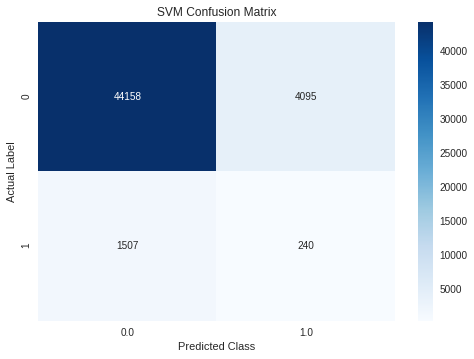

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn import metrics
from google.colab import files
 
confusion_matrix = pd.crosstab(results['label'], results['pred_class'], rownames = ['Actual Label'], colnames=['Predicted Class'])
sns.heatmap(confusion_matrix, annot = True, cmap ='Blues', fmt ='g')

print('Accuracy: ', metrics.accuracy_score(results['label'], results['pred_class']))
plt.title('SVM Confusion Matrix')
plt.savefig('SVM Confusion Matrix.png')
plt.show()
files.download("SVM Confusion Matrix.png") 

In [ ]:
from google.colab import files
files.download("SVM Confusion Matrix.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AUC: 0.53


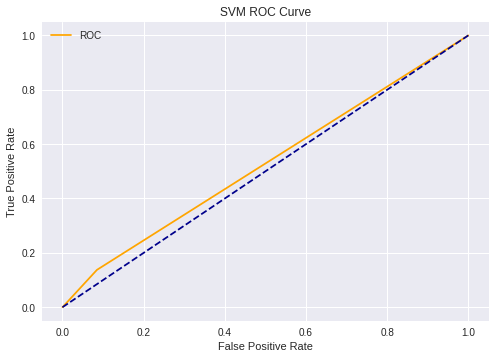

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM ROC Curve')
    plt.legend()
    plt.savefig('SVM_ROC_Curve.png')
    plt.show()
    
auc = roc_auc_score(y_test3, y_pred)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test3, y_pred)

plot_roc_curve(fpr, tpr)

from google.colab import files
files.download("SVM_ROC_Curve.png") 

## **KNN**

In [ ]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train_st,y_train_st.values.ravel())
y_predKNN = modelKNN.predict(X_test_st)

print(confusion_matrix(y_test_st,y_predKNN))
print(metrics.roc_auc_score(y_test_st,y_predKNN))

[[10340  4144]
 [  294   222]]
0.5720618742092316


tuning hyperparameters

In [ ]:
leaf_size = list(range(30,52,2))
n_neighbors = list(range(1,16,2))
p=[1,2] #When p = 1, this is equivalent to using manhattan distance (l1), and euclidean distance (l2) for p = 2.

para_to_test_KNN = [n_neighbors, leaf_size, p]
para_to_test_KNN = list(itertools.product(*para_to_test_KNN))
print( "all possible combinaisons of parameters : ", len(para_to_test_KNN))

all possible combinaisons of parameters :  176


In [ ]:
cmKNN = []
AUC_score_KNN = []

for i in range(len(para_to_test_KNN)):
    modelKNN = KNeighborsClassifier(n_neighbors = para_to_test_KNN[i][0], leaf_size= para_to_test_KNN[i][1], p= para_to_test_KNN[i][2])
    modelKNN.fit(X_train_st, y_train_st.values.ravel())
    y_predKNN = modelKNN.predict(X_test_st)
    cmKNN.append(confusion_matrix(y_test_st, y_predKNN))
    AUC_score_KNN.append(metrics.roc_auc_score(y_test_st, y_predKNN))
    print(i, ' done')

0  done
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done
19  done
20  done
21  done
22  done
23  done
24  done
25  done
26  done
27  done
28  done
29  done
30  done
31  done
32  done
33  done
34  done
35  done
36  done
37  done
38  done
39  done
40  done
41  done
42  done
43  done
44  done
45  done
46  done
47  done
48  done
49  done
50  done
51  done
52  done
53  done
54  done
55  done
56  done
57  done
58  done
59  done
60  done
61  done
62  done
63  done
64  done
65  done
66  done
67  done
68  done
69  done
70  done
71  done
72  done
73  done
74  done
75  done
76  done
77  done
78  done
79  done
80  done
81  done
82  done
83  done
84  done
85  done
86  done
87  done
88  done
89  done
90  done
91  done
92  done
93  done
94  done
95  done
96  done
97  done
98  done
99  done
100  done
101  done
102  done
103  done
104  done
105  done
106  done
107  done
108  done
109  done
110  done


In [ ]:
print(para_to_test_KNN[AUC_score_KNN.index(max(AUC_score_KNN))])
print(max(AUC_score_KNN))
print(cmKNN[AUC_score_KNN.index(max(AUC_score_KNN))]) 

(13, 30, 1)
0.5819363835126947
[[12235  2272]
 [  335   158]]


In [ ]:
#Testing other metrics of distances.

leaf_size = [20,40,60,80,100]
n_neighbors = [5,10,15,20]
metric=['euclidean', 'manhattan', 'hamming', 'canberra']

para_to_test_KNN2 = [n_neighbors, leaf_size, metric]
para_to_test_KNN2 = list(itertools.product(*para_to_test_KNN2))
print( "all possible combinaisons of parameters : ", len(para_to_test_KNN2))

all possible combinaisons of parameters :  80


In [ ]:
cmKNN2 = []
AUC_score_KNN2 = []

for i in range(len(para_to_test_KNN2)):
    modelKNN2 = KNeighborsClassifier(n_neighbors = para_to_test_KNN2[i][0], leaf_size= para_to_test_KNN2[i][1], metric= para_to_test_KNN2[i][2])
    modelKNN2.fit(X_train_st, y_train_st.values.ravel())
    y_predKNN2 = modelKNN2.predict(X_test_st)
    cmKNN2.append(confusion_matrix(y_test_st, y_predKNN2))
    AUC_score_KNN2.append(metrics.roc_auc_score(y_test_st, y_predKNN2))
    print(i, ' done')

0  done
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done
19  done
20  done
21  done
22  done
23  done
24  done
25  done
26  done
27  done
28  done
29  done
30  done
31  done
32  done
33  done
34  done
35  done
36  done
37  done
38  done
39  done
40  done
41  done
42  done
43  done
44  done
45  done
46  done
47  done
48  done
49  done
50  done
51  done
52  done
53  done
54  done
55  done
56  done
57  done
58  done
59  done
60  done
61  done
62  done
63  done
64  done
65  done
66  done
67  done
68  done
69  done
70  done
71  done
72  done
73  done
74  done
75  done
76  done
77  done
78  done
79  done


In [ ]:
cmKNN2

[array([[10341,  4143],
        [  294,   222]]), array([[11690,  2794],
        [  341,   175]]), array([[12202,  2282],
        [  351,   165]]), array([[11919,  2565],
        [  362,   154]]), array([[10340,  4144],
        [  294,   222]]), array([[11690,  2794],
        [  341,   175]]), array([[12189,  2295],
        [  351,   165]]), array([[11919,  2565],
        [  362,   154]]), array([[10340,  4144],
        [  294,   222]]), array([[11690,  2794],
        [  341,   175]]), array([[12192,  2292],
        [  351,   165]]), array([[11919,  2565],
        [  362,   154]]), array([[10340,  4144],
        [  294,   222]]), array([[11690,  2794],
        [  341,   175]]), array([[12192,  2292],
        [  351,   165]]), array([[11919,  2565],
        [  362,   154]]), array([[10341,  4143],
        [  294,   222]]), array([[11690,  2794],
        [  341,   175]]), array([[12182,  2302],
        [  352,   164]]), array([[11919,  2565],
        [  362,   154]]), array([[11595,  288

In [ ]:
AUC_score_KNN2

[0.5720963950598255,
 0.5731223868518912,
 0.5811071398752754,
 0.5606788244285595,
 0.5720618742092316,
 0.5731223868518912,
 0.5806583688175565,
 0.5606788244285595,
 0.5720618742092316,
 0.5731223868518912,
 0.5807619313693378,
 0.5606788244285595,
 0.5720618742092316,
 0.5731223868518912,
 0.5807619313693378,
 0.5606788244285595,
 0.5720963950598255,
 0.5731223868518912,
 0.5794477306153382,
 0.5606788244285595,
 0.5649979448051738,
 0.5736401996107975,
 0.5730517395297458,
 0.5621407423106812,
 0.5649979448051738,
 0.5736747204613912,
 0.5766515417172438,
 0.5621407423106812,
 0.5649979448051738,
 0.5736747204613912,
 0.5712518384359967,
 0.5621407423106812,
 0.5649979448051738,
 0.5736747204613912,
 0.5712518384359967,
 0.5621407423106812,
 0.5649979448051738,
 0.5736401996107975,
 0.5727065310238082,
 0.5621407423106812,
 0.5729698528608954,
 0.5870744301651221,
 0.5800265569706429,
 0.5685431558801051,
 0.5729698528608954,
 0.5870744301651221,
 0.5832442213701727,
 0.5685431558

In [ ]:
print(para_to_test_KNN2[AUC_score_KNN2.index(max(AUC_score_KNN2))])
print(max(AUC_score_KNN2))
print(cmKNN2[AUC_score_KNN2.index(max(AUC_score_KNN2))]) 

(15, 20, 'manhattan')
0.5870744301651221
[[12431  2053]
 [  353   163]]


In [ ]:
modelKNN3 = KNeighborsClassifier(n_neighbors = 15, leaf_size = 20, metric= 'manhattan')
modelKNN3.fit(X_train_st, y_train_st.values.ravel())
y_predKNN3 = modelKNN3.predict(X_test_st)

Confusion matrix, without normalization
[[12431  2053]
 [  353   163]]
Normalized confusion matrix
[[0.85825739 0.14174261]
 [0.68410853 0.31589147]]


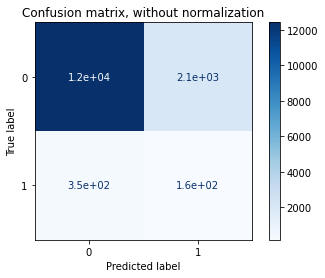

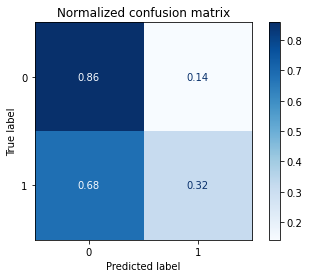

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(modelKNN3, X_test_st, y_test_st, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [ ]:
# Elbow curve for distance = 'manhattan' and leaf_size = 20

In [ ]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [ ]:
error_rate = []

for i in range(len(n_neighbors)):
    modelKNN3 = KNeighborsClassifier(n_neighbors = n_neighbors[i], leaf_size = 60, metric= 'euclidean')
    modelKNN3.fit(X_train_st, y_train_st.values.ravel())
    y_predKNN3 = modelKNN3.predict(X_test_st)
    error_rate.append(zero_one_loss(y_test_st,y_predKNN3))
    print(i, ' done')

0  done
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done


Text(0, 0.5, 'Error Rate')

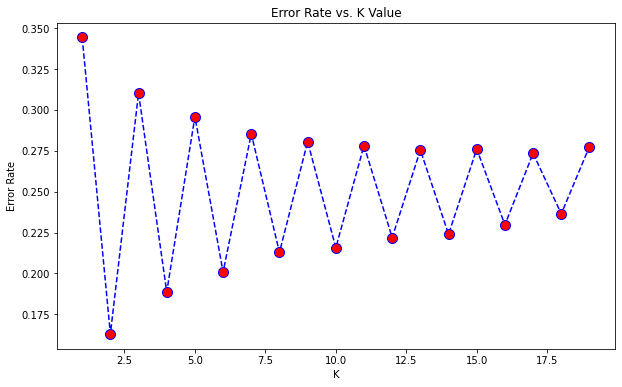

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(n_neighbors,error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## **Gradient Boosting Classifier**

Hyper Parameter Tuning Gradient Boosting Classifier

Learning_rate: learning rate shrinks the contribution of each tree

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc

learning_rates = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
train_results1 = []
test_results1 = []

for eta in learning_rates:
    model1 = GradientBoostingClassifier(learning_rate=eta)
    model1.fit(X_train1, y_train.values.ravel())
    train_pred1 = model1.predict(X_train1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred1)
   
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results1.append(roc_auc)
    
    y_pred1 = model1.predict(X_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results1.append(roc_auc)
    print("Learning rate: ", eta )
    print("Accuracy score (training): {0:.3f}".format(model1.score(X_train1, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model1.score(X_test1, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.792
Accuracy score (validation): 0.445
Learning rate:  0.075
Accuracy score (training): 0.802
Accuracy score (validation): 0.512
Learning rate:  0.1
Accuracy score (training): 0.806
Accuracy score (validation): 0.466
Learning rate:  0.25
Accuracy score (training): 0.819
Accuracy score (validation): 0.378
Learning rate:  0.5
Accuracy score (training): 0.824
Accuracy score (validation): 0.237
Learning rate:  0.75
Accuracy score (training): 0.825
Accuracy score (validation): 0.178
Learning rate:  1
Accuracy score (training): 0.825
Accuracy score (validation): 0.190


In [ ]:
print(train_results1)

[0.7918866907986114, 0.8022624933889784, 0.8061829733038304, 0.81881517313874, 0.8236212416033849, 0.8254484373275163, 0.8252696720109534]


In [ ]:
print(test_results1)

[0.5582717603730732, 0.5741687635282507, 0.5646202368237871, 0.5591849815955686, 0.5390120194050184, 0.5245412921703173, 0.5283472632413745]


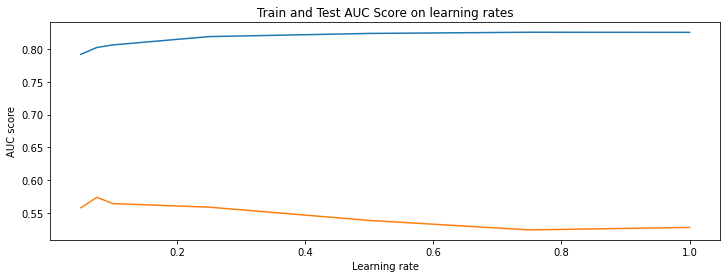

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results1, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results1, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Train and Test AUC Score on learning rates')
plt.ylabel('AUC score')
plt.xlabel('Learning_rates')
plt.savefig('Learning Rates.png')
plt.show()

N_estimators : the number of trees in the forest



Choosing n_estimators : number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
train_results2 = []
test_results2 = []
for estimator in n_estimators:
    model2 = GradientBoostingClassifier(n_estimators=estimator)
    model2.fit(X_train1, y_train.values.ravel())
    train_pred2 = model2.predict(X_train1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred2)
    roc_auc2 = auc(false_positive_rate, true_positive_rate)
    train_results2.append(roc_auc2)
    
    y_pred2 = model2.predict(X_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
    roc_auc2 = auc(false_positive_rate, true_positive_rate)
    test_results2.append(roc_auc2)
    print("n_estimators: ", estimator)
    print("Accuracy score (training): {0:.3f}".format(model2.score(X_train1, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model2.score(X_test1, y_test)))

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results2, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results2, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Train and Test AUC Score on number of estimators')
plt.ylabel('AUC score')
plt.xlabel('Number of trees')
plt.savefig('N_estimators.png')
plt.show()

Max_depth : This indicates how deep the built tree can be
This indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 30 and plot the training and test errors.

In [ ]:
max_depths = np.linspace(1, 27, 27, endpoint=True)
train_results3 = []
test_results3 = []

for max_depth in max_depths:
    model3 = GradientBoostingClassifier(max_depth=max_depth)
    model3.fit(X_train1, y_train.values.ravel())
    train_pred3 = model3.predict(X_train1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train1, train_pred3)
    roc_auc3 = auc(false_positive_rate, true_positive_rate)
    train_results3.append(roc_auc3)
    
    y_pred3 = model3.predict(X_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred3)
    roc_auc3 = auc(false_positive_rate, true_positive_rate)
    test_results3.append(roc_auc3)
    print("max_depth: ", max_depth)
    print("Accuracy score (training): {0:.3f}".format(model3.score(X_train1, y_train)))
    print("Accuracy score (test): {0:.3f}".format(model3.score(X_test1, y_test)))


In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results3, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results3, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Train and Test AUC Score on Tree Depth')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.savefig('max_depth.png')
plt.show()


Min_samples_split : the minimum number of samples required to split an internal node

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results4 = []
test_results4 = []

for min_samples_split in min_samples_splits:
    model4 = GradientBoostingClassifier(min_samples_split=min_samples_split)
    model4.fit(X_train1, y_train.values.ravel())
    train_pred4 = model4.predict(X_train1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred4)
    roc_auc4 = auc(false_positive_rate, true_positive_rate)
    train_results4.append(roc_auc4)
    
    y_pred4 = model4.predict(X_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred4)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results4.append(roc_auc)
    print("Min_samples_split: ", min_samples_split)
    print("Accuracy score (training): {0:.3f}".format(model4.score(X_train1, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model4.score(X_test1, y_test)))

In [ ]:
line1, = plt.plot(min_samples_splits, train_results4, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results4, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Train and Test AUC Score on Minimum sample split')
plt.ylabel('AUC score')
plt.xlabel('Min samples split')
plt.savefig('min_sample_split.png')
plt.show()

Min_samples_leaf: minimum number of samples required to be at a leaf node

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results5 = []
test_results5 = []

for min_samples_leaf in min_samples_leafs:
    model5 = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
    model5.fit(X_train1, y_train.values.ravel())
    train_pred5 = model5.predict(X_train1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred5)
    roc_auc5 = auc(false_positive_rate, true_positive_rate)
    train_results5.append(roc_auc5)
    
    y_pred5 = model5.predict(X_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred5)
    roc_auc5 = auc(false_positive_rate, true_positive_rate)
    test_results5.append(roc_auc5)
    print("Min_samples_split: ", min_samples_leaf)
    print("Accuracy score (training): {0:.3f}".format(model5.score(X_train1, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model5.score(X_test1, y_test)))


In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results5, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results5, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.title('Train and Test AUC Score on Minimum Sample Leafs')
plt.xlabel('min samples leaf')
plt.savefig('min_sample_leaf.png')
plt.show()

Max_features: the number of features to consider when looking for the best split

In [ ]:
max_features = list(range(1,27))
train_results6 = []
test_results6 = []

for max_feature in max_features:
    model6 = GradientBoostingClassifier(max_features=max_feature)
    model6.fit(X_train1, y_train.values.ravel())
    train_pred6 = model6.predict(X_train1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred6)
    roc_auc6 = auc(false_positive_rate, true_positive_rate)
    train_results6.append(roc_auc6)
    
    y_pred6 = model6.predict(X_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred6)
    roc_auc6 = auc(false_positive_rate, true_positive_rate)
    test_results6.append(roc_auc6)
    print("max_features: ", max_feature)
    print("Accuracy score (training): {0:.3f}".format(model6.score(X_train1, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model6.score(X_test1, y_test)))


In [ ]:
line1, = plt.plot(max_features, train_results6, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results6, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Train and Test AUC Score on Max number of features')
plt.ylabel('AUC score')
plt.xlabel('Max features')
plt.savefig('max_features.png')
plt.show()

Gradient Boosting Classifier with tuned Parameters

In [ ]:
model_fin = GradientBoostingClassifier(learning_rate= 0.75, n_estimators =8, max_depth=5, min_samples_split= 0.1,min_samples_leaf=5, max_features=21)
model_fin.fit(X_train1, y_train.values.ravel())
pred_fin = model_fin.predict(X_test1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_fin)
roc_auc = auc(false_positive_rate, true_positive_rate)

AUC: 0.56


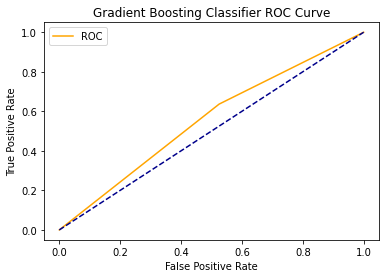

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Gradient Boosting Classifier ROC Curve')
    plt.legend()
    plt.savefig('Gradient Boosting Classifier ROC Curve.png')
    plt.show()
    
auc = roc_auc_score(y_test, pred_fin)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, pred_fin)

plot_roc_curve(fpr, tpr)
from google.colab import files
files.download("Gradient Boosting Classifier ROC Curve.png") 

In [ ]:
auc1 = roc_auc_score(y_test, pred_fin)
print('AUC: %.2f' % auc1)
print(pred_fin)
pred_fin.shape

y_preds_g = pd.DataFrame(pred_fin, columns= ['pred_fin'])
y_preds_g.reset_index(drop = True, inplace= True)
X_test1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


results_g = pd.concat([y_test, y_preds_g], axis=1)
results_g

def threshold(t):
    results_g['class_t'] = np.where(results['pred_fin'] >= t , 1, 0)
    confusion_mtx_g = pd.crosstab(results_g['y'], results['class_t'], rownames = ['Actual Y'], colnames=['Predicted Class'])
    sns.heatmap(confusion_mtx_g, annot = True, cmap ='Blues', fmt ='g')

    TP = confusion_mtx_g.iloc[1,1]
    FP = confusion_mtx_g.iloc[0,1]
    TN = confusion_mtx_g.iloc[0,0]
    FN = confusion_mtx_g.iloc[1,0]

    TP_rate = TP/(TP+FP)
    FP_rate = FP/(TP+FP)
    TN_rate = TN/(TN+FN)
    FN_rate = FN/(TN+FN)

    plt.show()
    print("True positives rate:", TP_rate)
    print("False positives rate:", FP_rate)
    print("True negatives rate:", TN_rate)
    print("False Negatives rate:", FN_rate)
    print('Accuracy: ', metrics.accuracy_score(results_g['y'], results_g['class_t']))

AUC: 0.56
[0 1 1 ... 1 0 1]


In [ ]:
results_g.loc[results_g['pred_fin'] >= 0.5, 'pred_class'] = 1
results_g.loc[results_g['pred_fin'] < 0.5, 'pred_class'] = 0

Accuracy:  0.4804259273295884


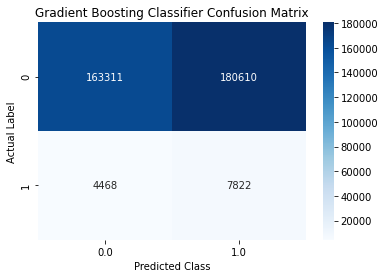

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn import metrics
from google.colab import files
 
confusion_matrix = pd.crosstab(results_g['label'], results_g['pred_class'], rownames = ['Actual Label'], colnames=['Predicted Class'])
sns.heatmap(confusion_matrix, annot = True, cmap ='Blues', fmt ='g')

print('Accuracy: ', metrics.accuracy_score(results_g['label'], results_g['pred_class']))
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.savefig('Gradient Boosting Classifier Confusion Matrix.png')
plt.show()
files.download("Gradient Boosting Classifier Confusion Matrix.png") 

In [ ]:
logit_model1 = logit('y ~ education_secondary + education_tertiary + education_unknown + duration + campaign', data= bankdata).fit()
logit_model1.summary()

### **XGBOOST Classifier**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

xgb_clf = XGBClassifier(learning_rate= 0.75, n_estimators =8, max_depth=5, min_samples_split= 0.1,min_samples_leaf=5, max_features=21)
xgb_clf.fit(X_train1, y_train.values.ravel())
y_xgb = xgb_clf.predict(X_test1)

print('Test Accuracy:', accuracy_score(y_test, y_xgb))

Test Accuracy: 0.8707086530174531


In [ ]:
print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93    343921
           1       0.08      0.27      0.12     12290

    accuracy                           0.87    356211
   macro avg       0.53      0.58      0.53    356211
weighted avg       0.94      0.87      0.90    356211



In [ ]:
cols= []
feature_imp = []
for col,score in zip(X_train1.columns,xgb_clf.feature_importances_):
    cols.append(col)
    feature_imp.append(score)

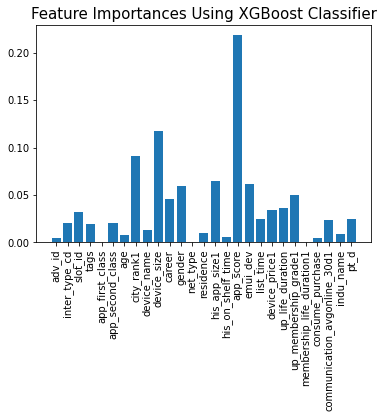

In [ ]:
col_names = ['adv_id', 'inter_type_cd', 'slot_id', 'tags', 'app_first_class', 'app_second_class', 
                                                 'age', 'city_rank1', 'device_name', 'device_size', 'career', 'gender', 'net_type', 
                                                 'residence', 'his_app_size1', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time',
                                                 'device_price1', 'up_life_duration', 'up_membership_grade1', 'membership_life_duration1',
                                                 'consume_purchase', 'communication_avgonline_30d1', 'indu_name', 'pt_d']
plt.bar(cols, feature_imp)
plt.xticks(cols, col_names, rotation='vertical')
plt.title('Feature Importances Using XGBoost Classifier', size = (15))
plt.savefig('Feature Importances Using XGBoost Classifier', bbox_inches = 'tight')
plt.show()

In [ ]:
score_final = xgb_clf.score(X_test1, y_test)
print(score_final)

0.8707086530174531


In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_xgb)
print(cm)


[[306878  37043]
 [  9012   3278]]


AUC: 0.58


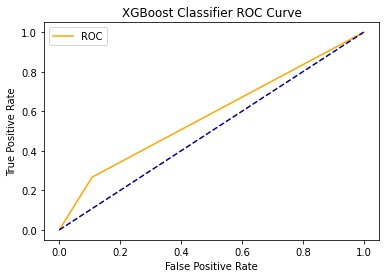

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGBoost Classifier ROC Curve')
    plt.legend()
    plt.savefig('XGBoost Classifier ROC Curve.png')
    plt.show()
    
auc = roc_auc_score(y_test, y_xgb)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_xgb)

plot_roc_curve(fpr, tpr)
from google.colab import files
files.download("XGBoost Classifier ROC Curve.png") 

In [ ]:
auc1 = roc_auc_score(y_test, y_xgb)
print('AUC: %.2f' % auc1)
print(y_xgb)
y_xgb.shape

y_preds_g = pd.DataFrame(y_xgb, columns= ['pred_fin'])
y_preds_g.reset_index(drop = True, inplace= True)
X_test1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


results_g = pd.concat([y_test, y_preds_g], axis=1)
results_g

def threshold(t):
    results_g['class_t'] = np.where(results['pred_fin'] >= t , 1, 0)
    confusion_mtx_g = pd.crosstab(results_g['y'], results['class_t'], rownames = ['Actual Y'], colnames=['Predicted Class'])
    sns.heatmap(confusion_mtx_g, annot = True, cmap ='Blues', fmt ='g')

    TP = confusion_mtx_g.iloc[1,1]
    FP = confusion_mtx_g.iloc[0,1]
    TN = confusion_mtx_g.iloc[0,0]
    FN = confusion_mtx_g.iloc[1,0]

    TP_rate = TP/(TP+FP)
    FP_rate = FP/(TP+FP)
    TN_rate = TN/(TN+FN)
    FN_rate = FN/(TN+FN)

    plt.show()
    print("True positives rate:", TP_rate)
    print("False positives rate:", FP_rate)
    print("True negatives rate:", TN_rate)
    print("False Negatives rate:", FN_rate)
    print('Accuracy: ', metrics.accuracy_score(results_g['y'], results_g['class_t']))

AUC: 0.57
[0 0 1 ... 0 0 1]


In [ ]:
results_g.loc[results_g['pred_fin'] >= 0.5, 'pred_class'] = 1
results_g.loc[results_g['pred_fin'] < 0.5, 'pred_class'] = 0

Accuracy:  0.5699066003015066


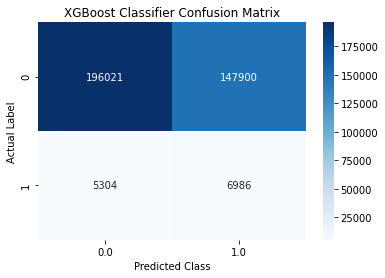

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn import metrics
from google.colab import files
 
confusion_matrix = pd.crosstab(results_g['label'], results_g['pred_class'], rownames = ['Actual Label'], colnames=['Predicted Class'])
sns.heatmap(confusion_matrix, annot = True, cmap ='Blues', fmt ='g')

print('Accuracy: ', metrics.accuracy_score(results_g['label'], results_g['pred_class']))
plt.title('XGBoost Classifier Confusion Matrix')
plt.savefig('XGBoost Confusion Matrix.png')
plt.show()
files.download("XGBoost Confusion Matrix.png") 

# **ARTIFICIAL NEURAL NETWORK** 
Binary Classification Using Deep Learning from Keras

In [ ]:
X_train4 = X_train.sample(n = 50000)
i = X_train4.index
y_train4 = y_train.iloc[i]

In [ ]:
X_test4 = X_test.sample(n = 50000)
i = X_test4.index
y_test4 = y_test.iloc[i]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
   
X_train4 = scaler.fit_transform(X_train4)
    
X_test4= scaler.fit_transform(X_test4)

In [ ]:
X_train4 = X_train4[:,0:27].astype(float)

In [ ]:
X_test4 = X_test4[:,0:27].astype(float)


1 Fully Connected Hidden Layer with 60 Neurons, trained on a sample of 50.000 observations of the original test set.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=27, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_test4, y_test4, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 96.63% (0.01%)


1 Fully Connected Hidden Layer with 60 Neurons, trained on a sample of 50.000 observations of the synthetized oversampled train set. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=27, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train4, y_train4, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 75.26% (1.41%)


2 Fully connected Hidden Layers, with 60 and 30 neurons respectively, trained  on a sample of 50.000 observations of the synthetized oversampled train set. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=27, activation='relu'))
	model.add(Dense(30, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=10, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train4, y_train4, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 76.70% (0.64%)


# **Unsupervised Learning**

#**Kmeans Clustering**

Small sample

In [ ]:
X_train3 = X_train.sample(n = 50000)
i = X_train3.index
y_train3 = y_train.iloc[i]

In [ ]:
X_test3 = X_test.sample(n = 50000)
i = X_test3.index
y_test3 = y_test.iloc[i]

In [ ]:
X_train3 = X_train3[['age1','city_rank1', 'his_app_size1', 'device_size', 'device_price1', 'up_membership_grade1', 'membership_life_duration1','communication_avgonline_30d1' ]]
X_test3 = X_test3[['age1','city_rank1', 'his_app_size1', 'device_size', 'device_price1', 'up_membership_grade1', 'membership_life_duration1','communication_avgonline_30d1' ]]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
   
X_train_sc1 = scaler.fit_transform(X_train3)
    
X_test_sc1= scaler.fit_transform(X_test3)

In [ ]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans1 = KMeans(init="random",  n_clusters=2, n_init=10, max_iter=300, random_state=42 )

In [ ]:
kmeans1.fit(X_test_sc1)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [ ]:
kmeans1.inertia_

10655.490033055163

In [ ]:
kmeans1.labels_

array([0, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
# Final locations of the centroid
kmeans1.cluster_centers_

array([[0.74926227, 0.3271909 , 0.3432733 , 0.2190322 , 0.54047958,
        0.05227794, 0.0013223 , 0.86430937],
       [0.76363997, 0.88304094, 0.34312613, 0.22879794, 0.57708522,
        0.06873866, 0.00126574, 0.86938791]])

In [ ]:
# The number of iterations required to converg
kmeans1.n_iter_

5

In [ ]:
kmeans1.labels_

array([0, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
kmeans_kwargs = { "init": "random","n_init": 10,"max_iter": 300, "random_state": 42, }

# A list holds the SSE values for each k
sse1 = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X_test_sc)
  sse1.append(kmeans.inertia_)

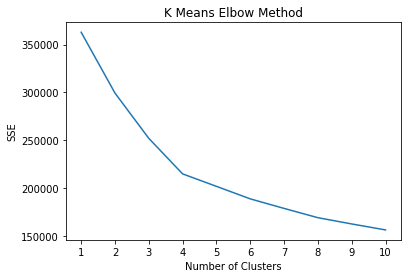

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
plt.plot(range(1, 11), sse1)
plt.xticks(range(1, 11))
plt.title('K Means Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.savefig('Kmeans Elbow method.png')
plt.show()
files.download("Kmeans Elbow method.png") 

In [ ]:
kl1 = KneeLocator(range(1, 11), sse1, curve="convex", direction="decreasing")
kl1.elbow

4

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients1 = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,11):
  kmeans1 = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans1.fit(X_test_sc1)
  np.unique(kmeans1.labels_)
  score1 = silhouette_score(X_test_sc1, kmeans1.labels_,  metric='euclidean')
  silhouette_coefficients1.append(score1)

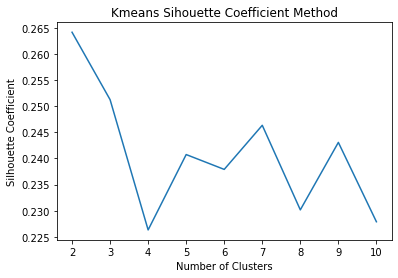

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
plt.plot(range(2, 11), silhouette_coefficients1)
plt.xticks(range(2, 11))
plt.title('Kmeans Sihouette Coefficient Method')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.savefig('Silhouette coef method.png')
plt.show()
files.download("Silhouette coef method.png") 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [ ]:
# Instantiate k-means and dbscan algorithms
kmeans1 = KMeans(n_clusters=2)
dbscan1 = DBSCAN(eps=0.3,)

#Fit the algorithms to the features
kmeans1.fit(X_test_sc1)
np.unique(kmeans1.labels_)
dbscan1.fit(X_test_sc1), 
np.unique(dbscan1.labels_)

# Compute the silhouette scores for each algorithm
kmeans_silhouette1 = silhouette_score(X_test_sc1, kmeans1.labels_, metric='euclidean').round(2)
dbscan_silhouette1 = silhouette_score(X_test_sc1, dbscan1.labels_, metric='euclidean').round (2)

In [ ]:
np.unique(kmeans1.labels_)

array([0, 1], dtype=int32)

In [ ]:
np.unique(dbscan1.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

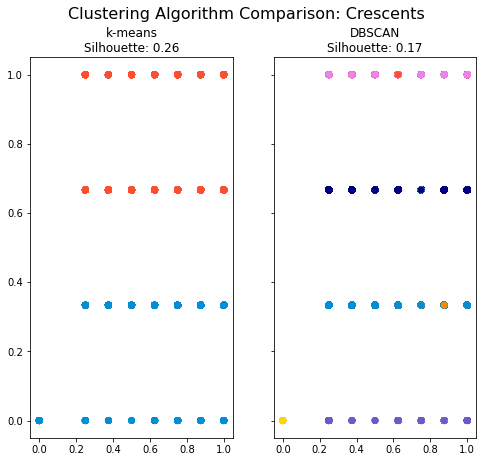

In [ ]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 7), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {-1: 'darkolivegreen', 0: "#008fd5",1: "#fc4f30",2: "violet", 3: 'aquamarine', 4: 'navy', 5: 'darkorange',6:'gold',7:'slateblue',8:'lightpink',9:'lawngreen',10:'peru', 11:'red',}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans1.labels_]
ax1.scatter(X_test_sc1[:, 0], X_test_sc1[:, 1], c=km_colors)
ax1.set_title( f"k-means\nSilhouette: {kmeans_silhouette1}", fontdict={"fontsize": 12} )

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan1.labels_]
ax2.scatter(X_test_sc1[:, 0], X_test_sc1[:, 1], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette1}", fontdict={"fontsize": 12})
plt.show()

KMeans Clustering on features App Storage SIze and Devize Size

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
   
X_train_sc1 = scaler.fit_transform(X_train4)
    
X_test_sc1= scaler.fit_transform(X_test4)

In [ ]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans1 = KMeans(init="random",  n_clusters=4, n_init=10, max_iter=300, random_state=42 )

In [ ]:
kmeans1.fit(X_test_sc1)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [ ]:
kmeans1.inertia_

62963.84144021037

In [ ]:
# The number of iterations required to converg
kmeans1.n_iter_

9

In [ ]:
kmeans_kwargs = { "init": "random","n_init": 10,"max_iter": 300, "random_state": 42, }

# A list holds the SSE values for each k
sse1 = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X_test_sc)
  sse1.append(kmeans.inertia_)

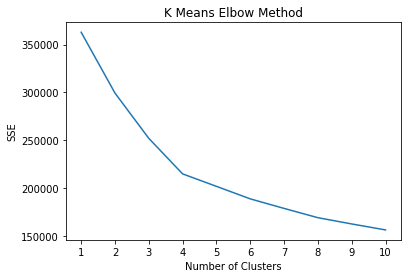

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
plt.plot(range(1, 11), sse1)
plt.xticks(range(1, 11))
plt.title('K Means Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.savefig('Kmeans Elbow method.png')
plt.show()
files.download("Kmeans Elbow method.png") 

In [ ]:
kl1 = KneeLocator(range(1, 11), sse1, curve="convex", direction="decreasing")
kl1.elbow

4

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients1 = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,11):
  kmeans1 = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans1.fit(X_test_sc1)
  np.unique(kmeans1.labels_)
  score1 = silhouette_score(X_test_sc1, kmeans1.labels_,  metric='euclidean')
  silhouette_coefficients1.append(score1)

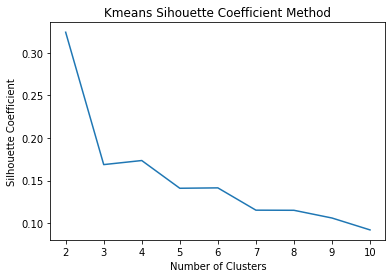

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
plt.plot(range(2, 11), silhouette_coefficients1)
plt.xticks(range(2, 11))
plt.title('Kmeans Sihouette Coefficient Method')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.savefig('Silhouette coef method.png')
plt.show()
files.download("Silhouette coef method.png") 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [ ]:
# Instantiate k-means and dbscan algorithms
kmeans1 = KMeans(n_clusters=4)
dbscan1 = DBSCAN(eps=0.3,)

#Fit the algorithms to the features
kmeans1.fit(X_test_sc1)
np.unique(kmeans1.labels_)
dbscan1.fit(X_test_sc1), 
np.unique(dbscan1.labels_)

# Compute the silhouette scores for each algorithm
kmeans_silhouette1 = silhouette_score(X_test_sc1, kmeans1.labels_, metric='euclidean').round(2)
dbscan_silhouette1 = silhouette_score(X_test_sc1, dbscan1.labels_, metric='euclidean').round (2)

In [ ]:
np.unique(dbscan1.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

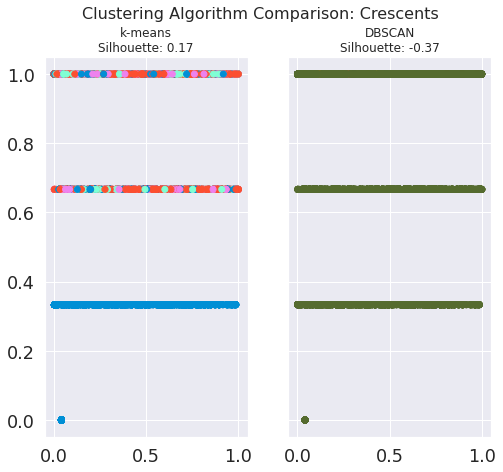

In [ ]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 7), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {-1: 'darkolivegreen', 0: "#008fd5",1: "#fc4f30",2: "violet", 3: 'aquamarine', 4: 'slategrey', 5: 'darkorange',6:'gold',7:'slateblue',8:'lightpink',9:'lawngreen',10:'peru', 11:'red', 12: 'navy', 13: 'seashell'}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans1.labels_]
ax1.scatter(X_test_sc1[:, 0], X_test_sc1[:, 1], c=km_colors)
ax1.set_title( f"k-means\nSilhouette: {kmeans_silhouette1}", fontdict={"fontsize": 12} )

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan1.labels_]
ax2.scatter(X_test_sc1[:, 0], X_test_sc1[:, 1], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette1}", fontdict={"fontsize": 12})
plt.show()